In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Sarthak\Desktop\Data Science\Python\alzheimers_prediction_dataset.csv")

In [3]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [4]:
df["Alzheimer’s Diagnosis"].value_counts()

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

In [5]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)


In [6]:
cat

['Country',
 'Gender',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']

In [7]:
num

['Age', 'Education Level', 'BMI', 'Cognitive Test Score']

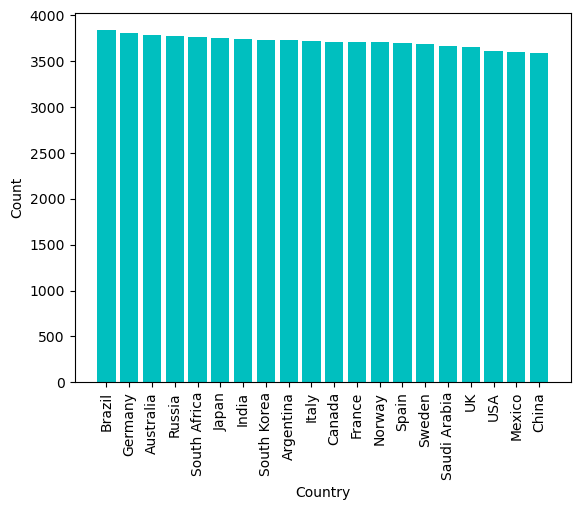

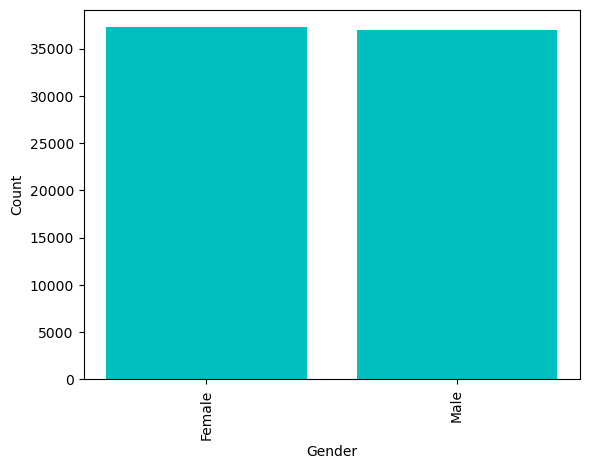

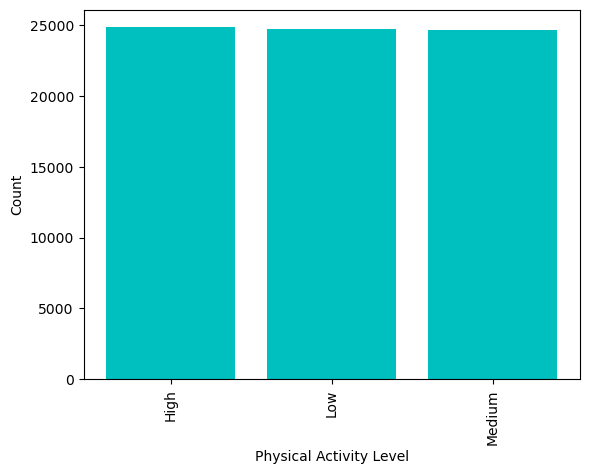

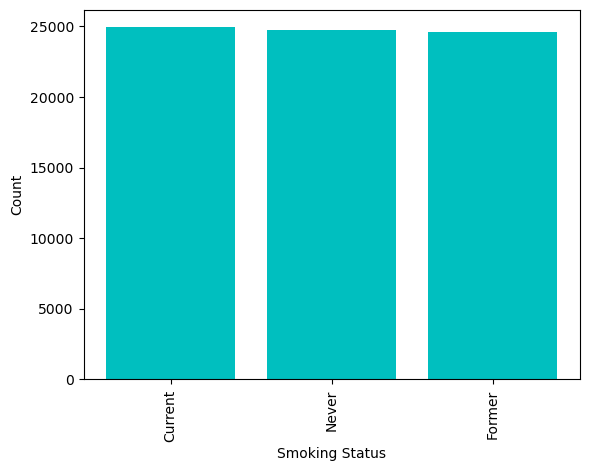

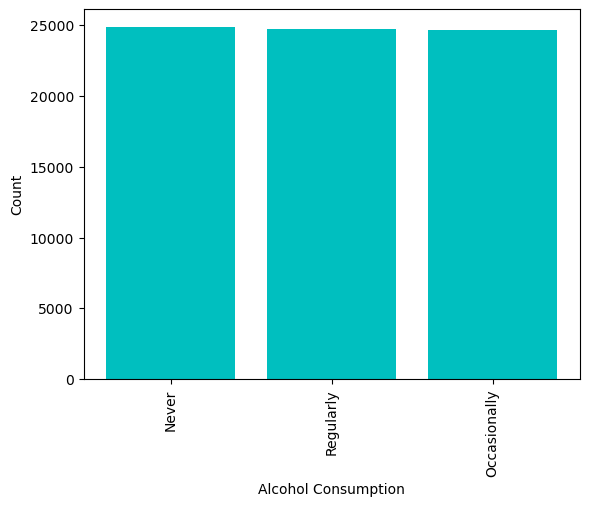

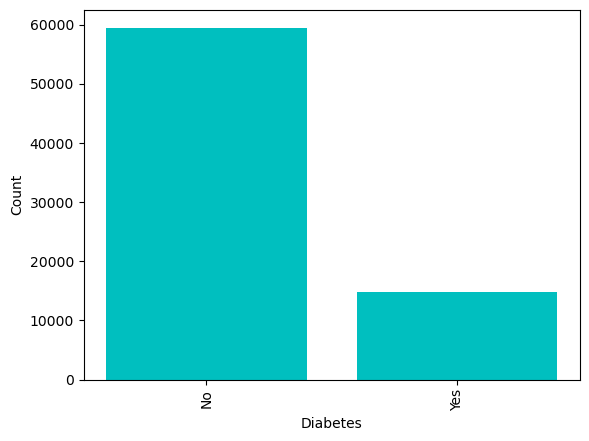

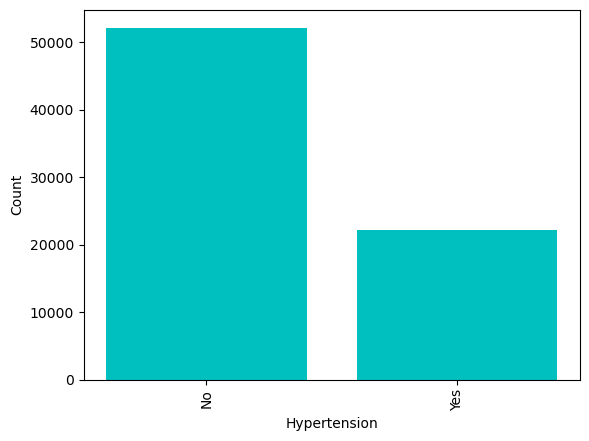

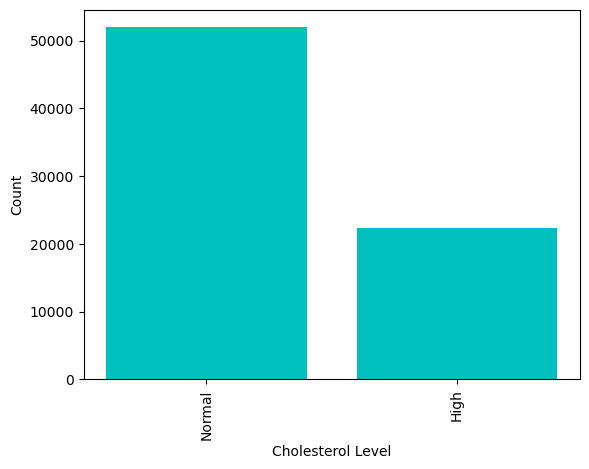

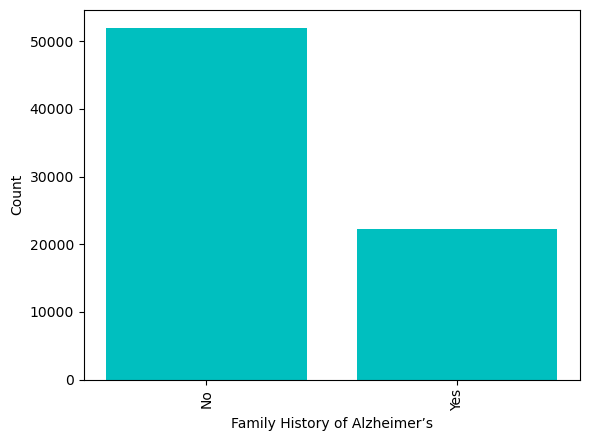

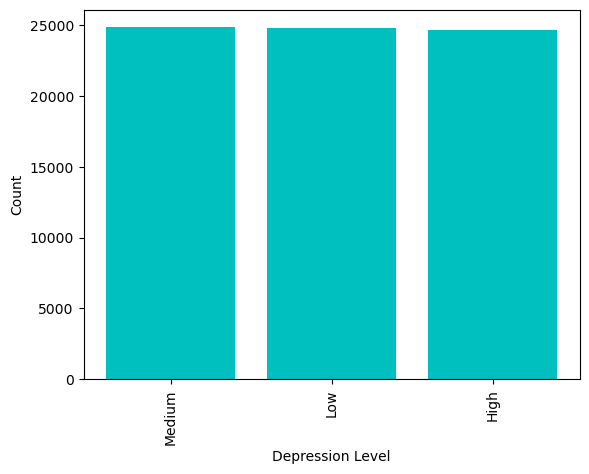

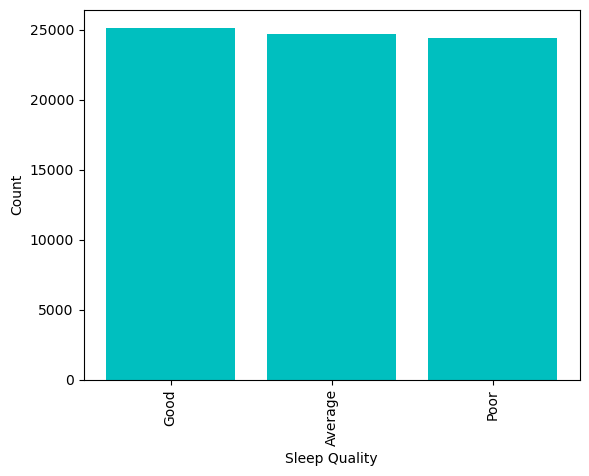

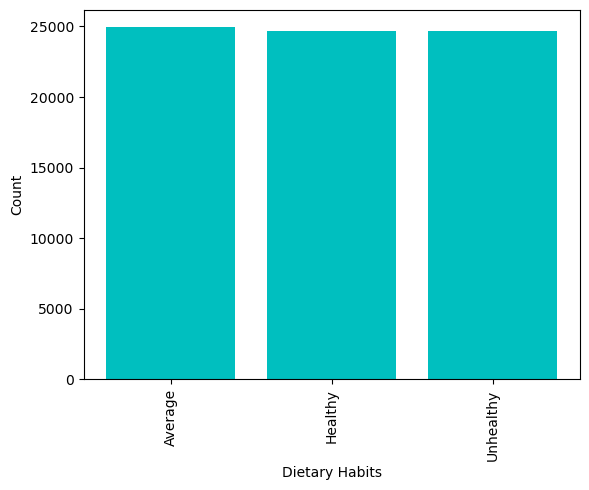

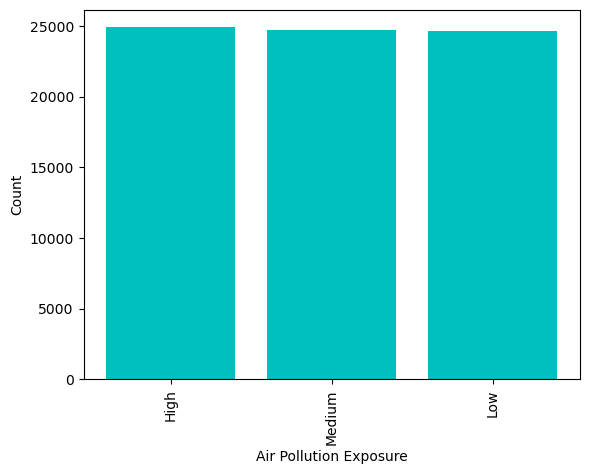

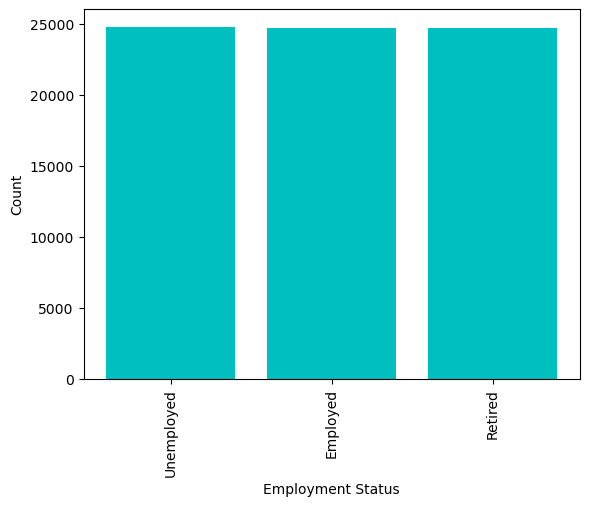

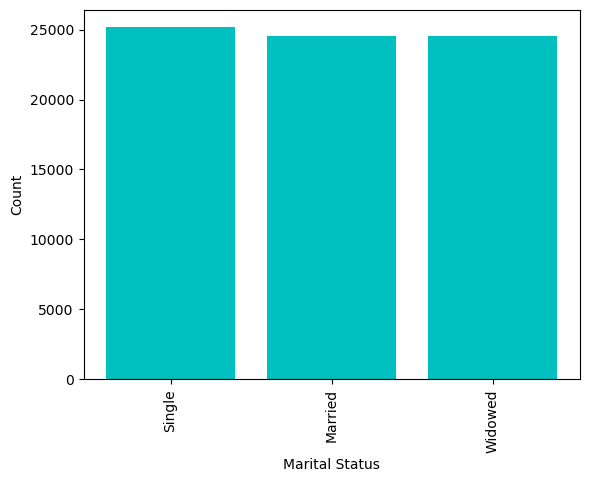

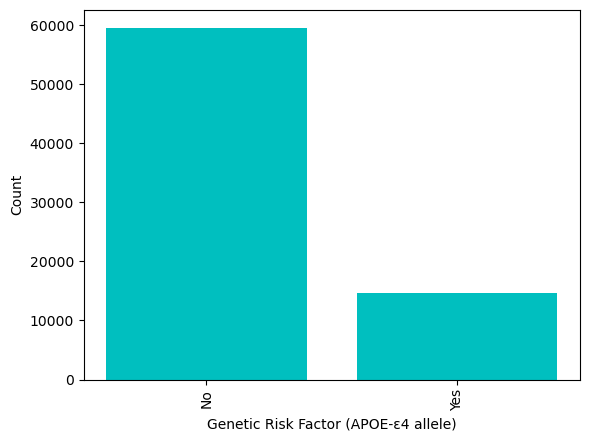

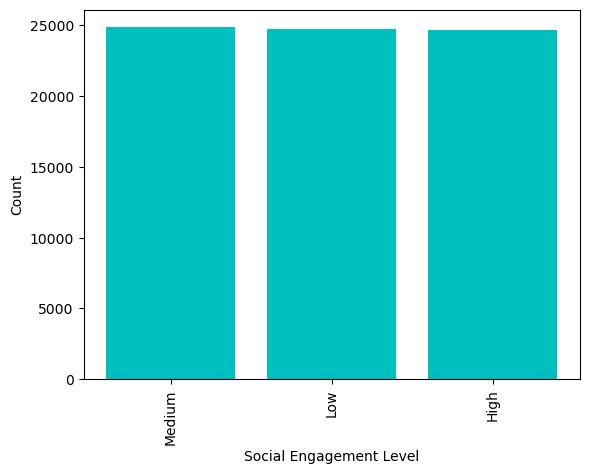

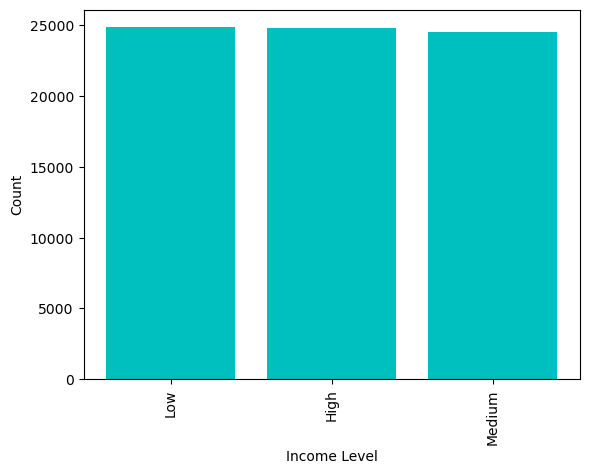

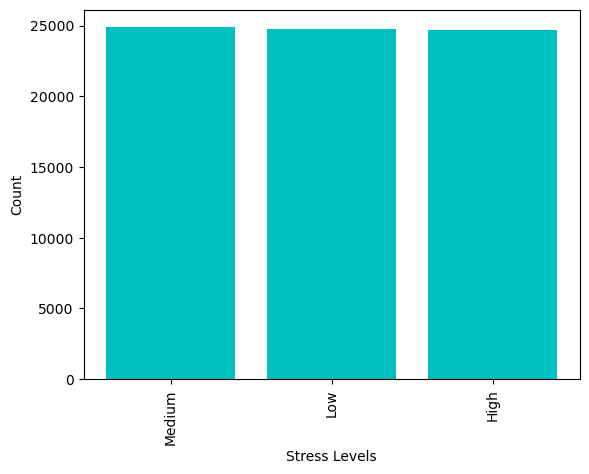

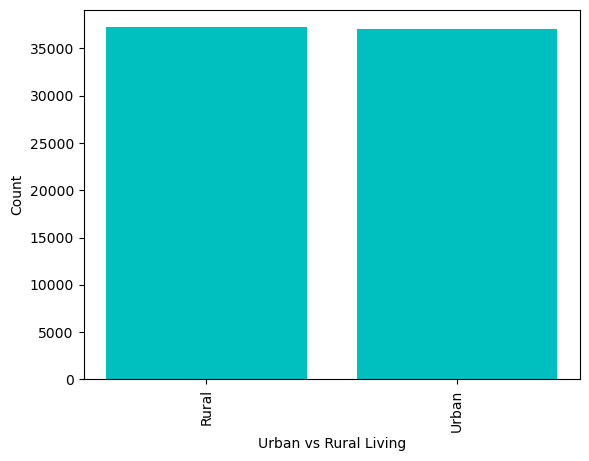

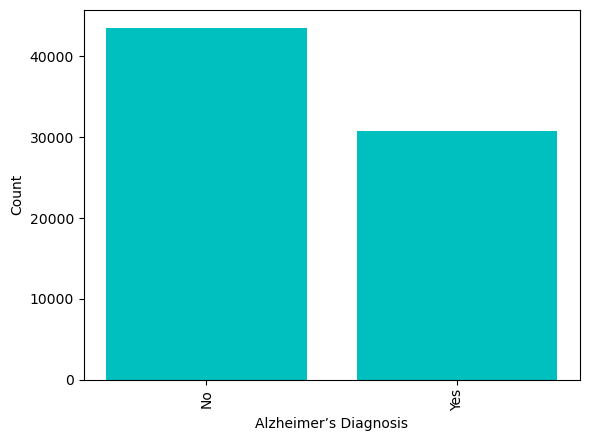

In [8]:
for i in cat:
    vc=df[i].value_counts()
    plt.bar(vc.index,height=vc,color='c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

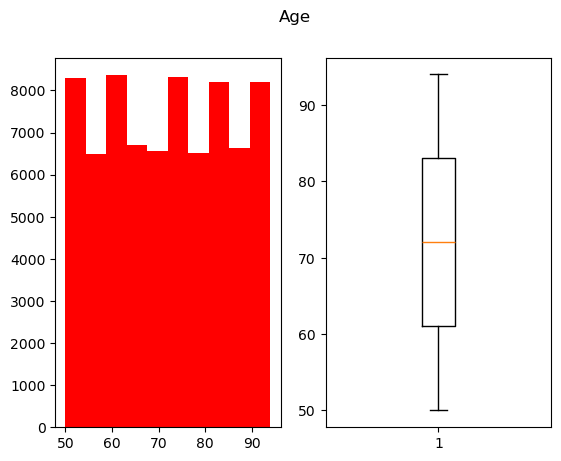

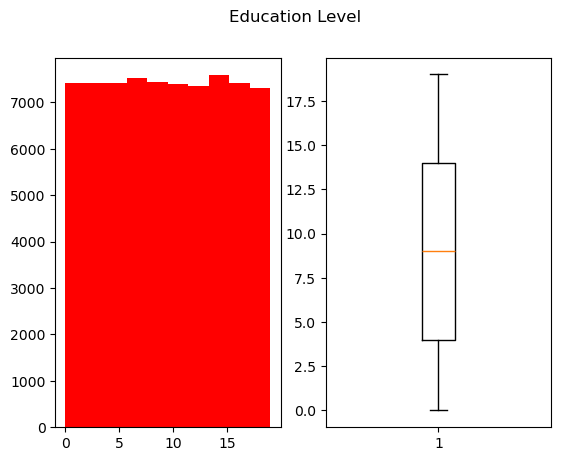

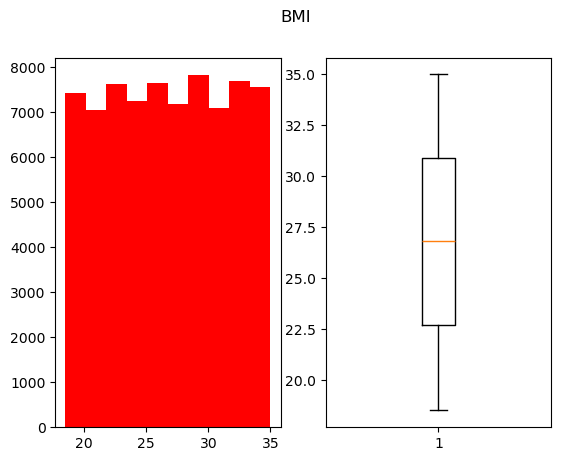

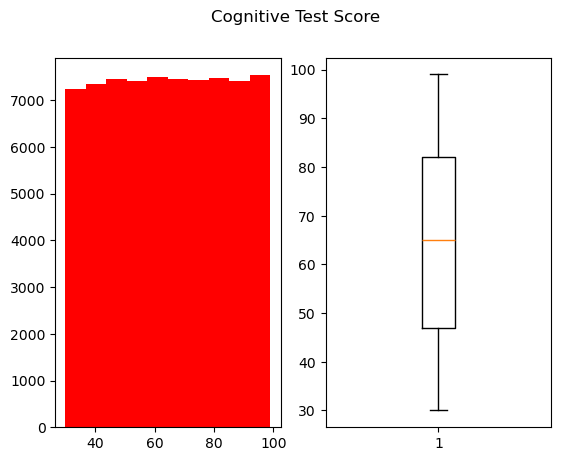

In [9]:
 for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df[i],color='r')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

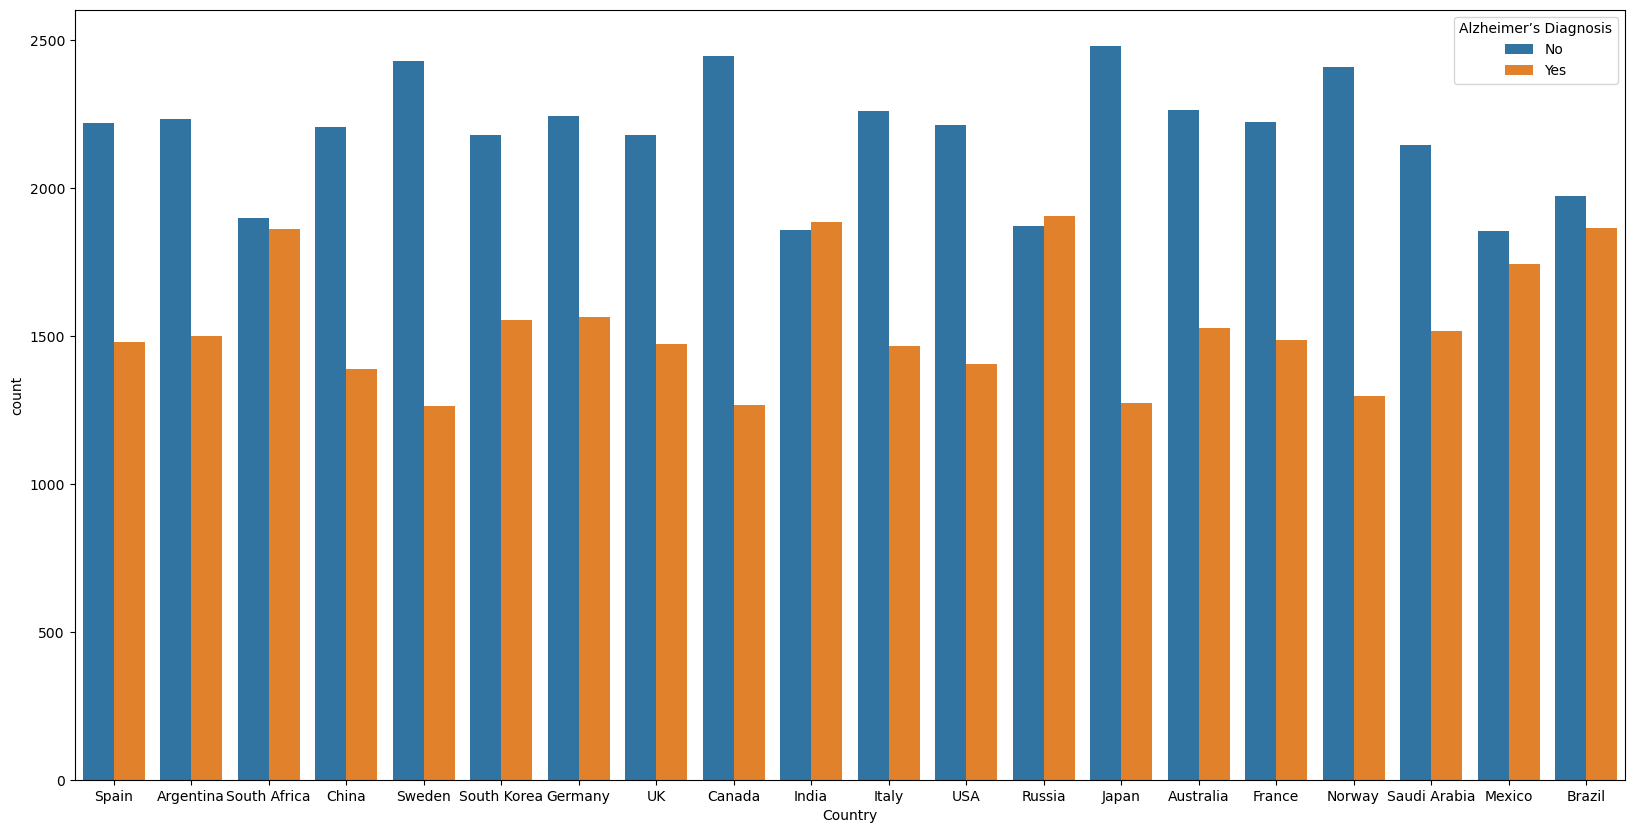

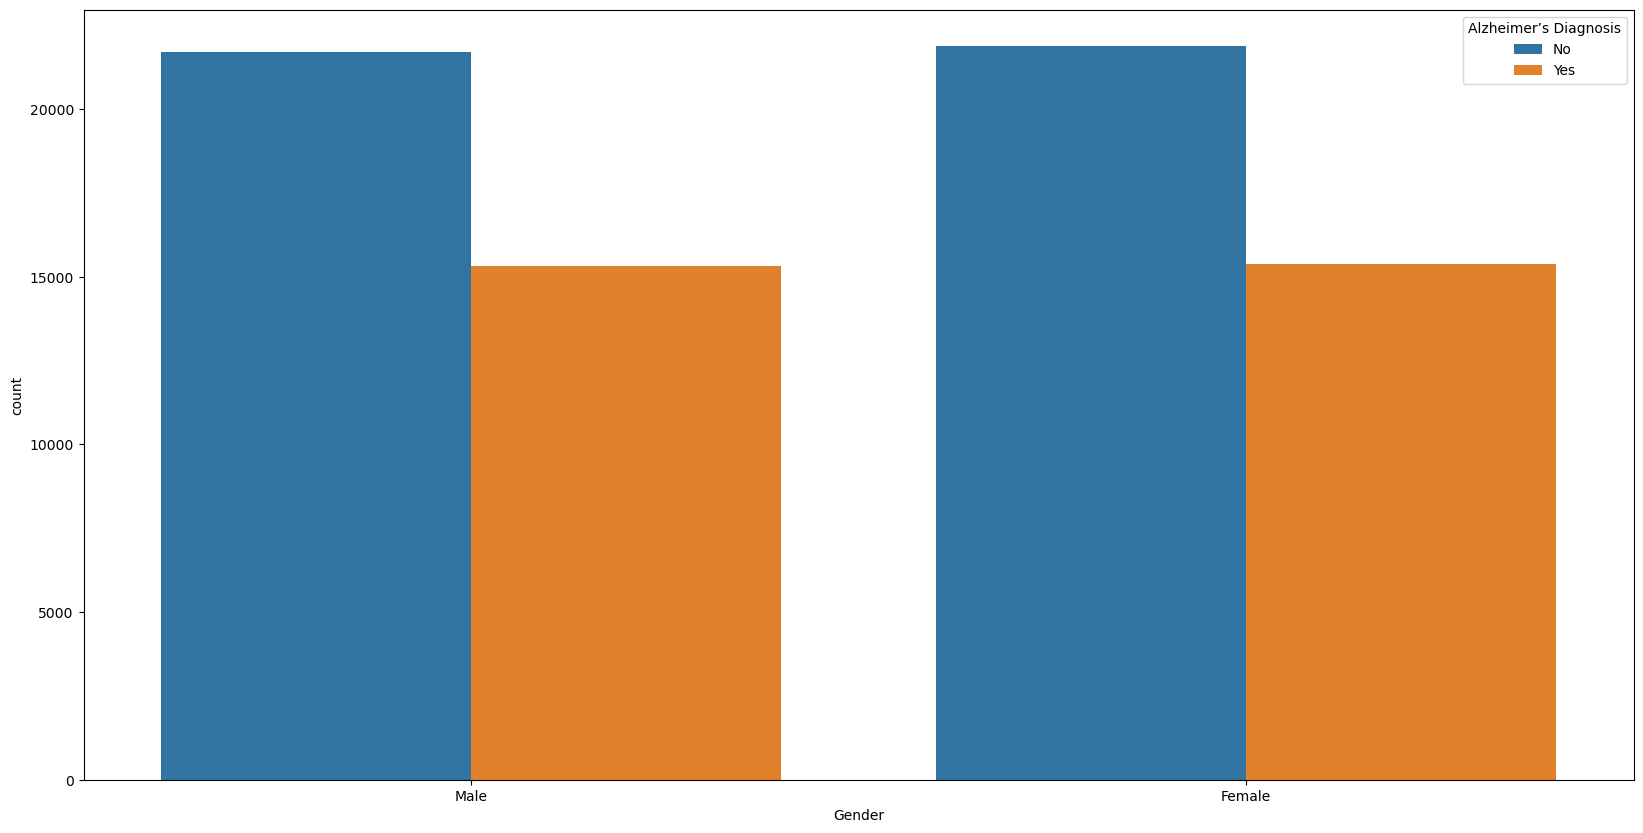

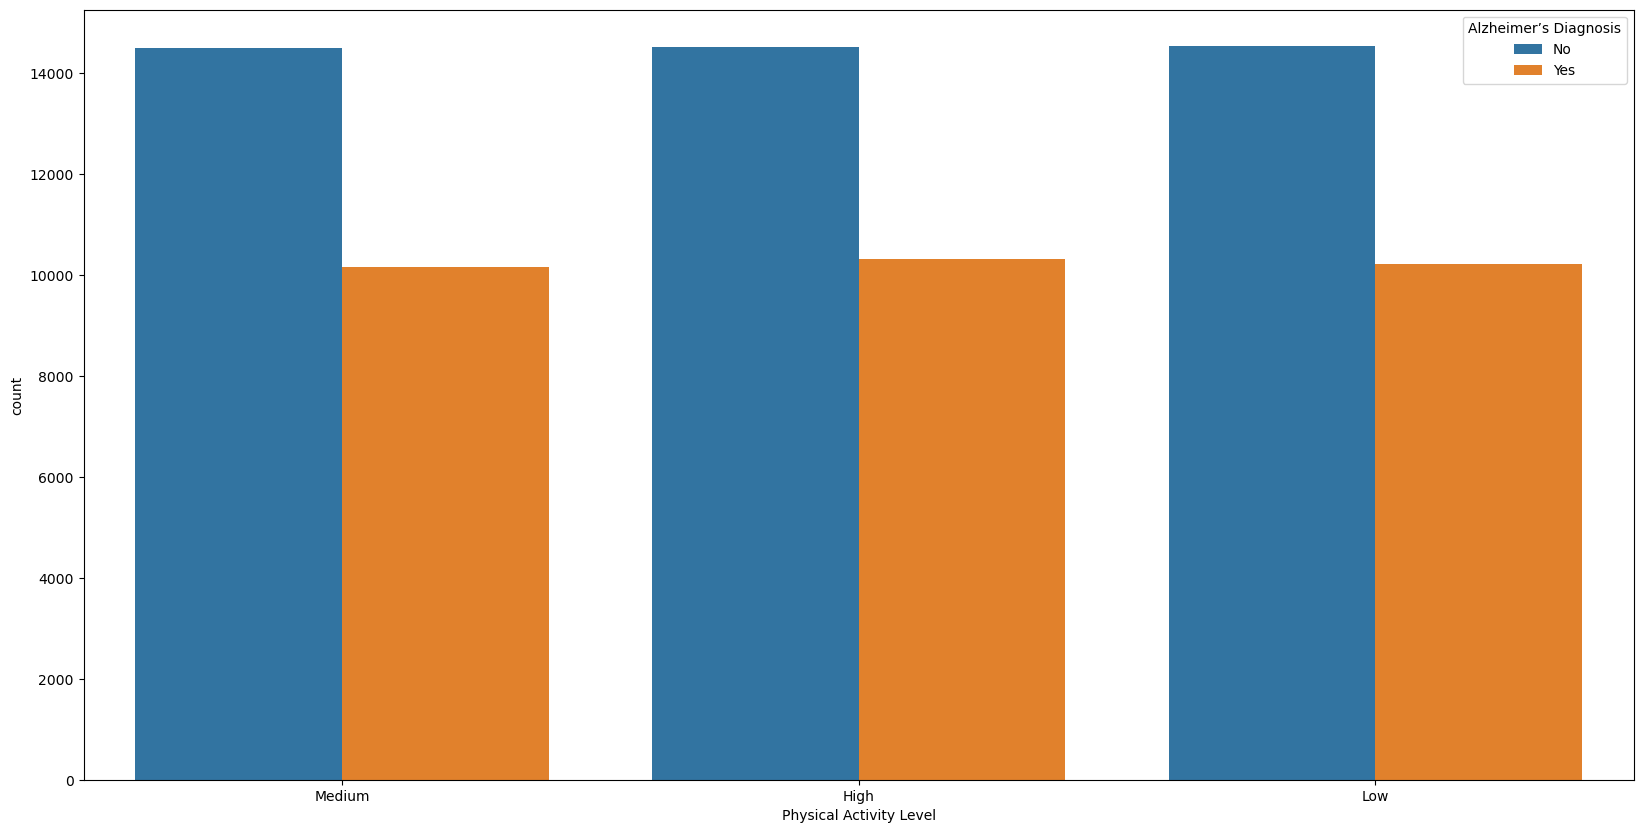

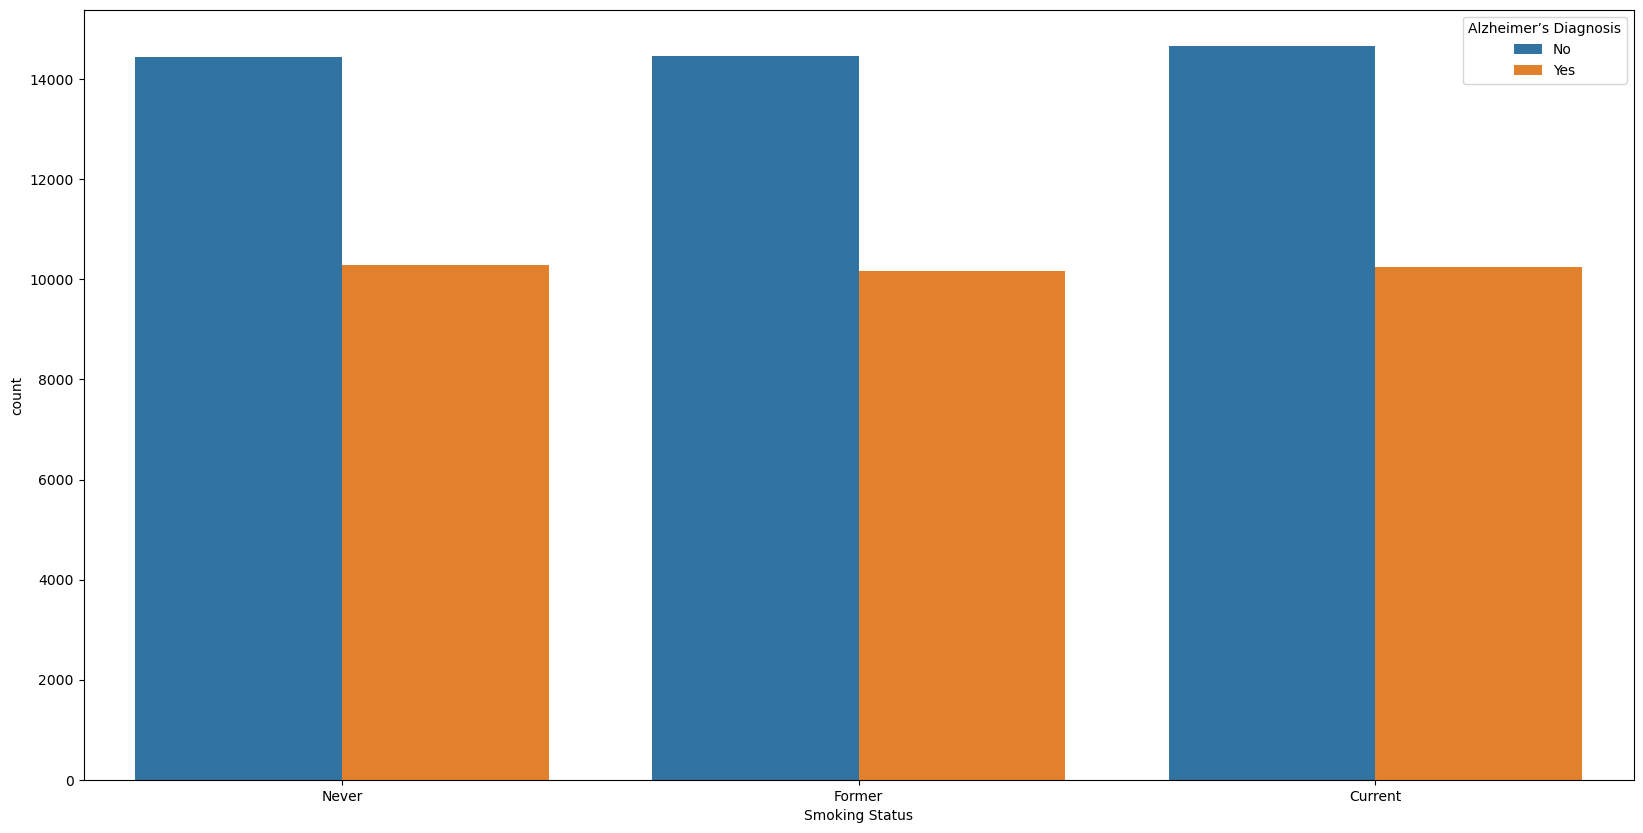

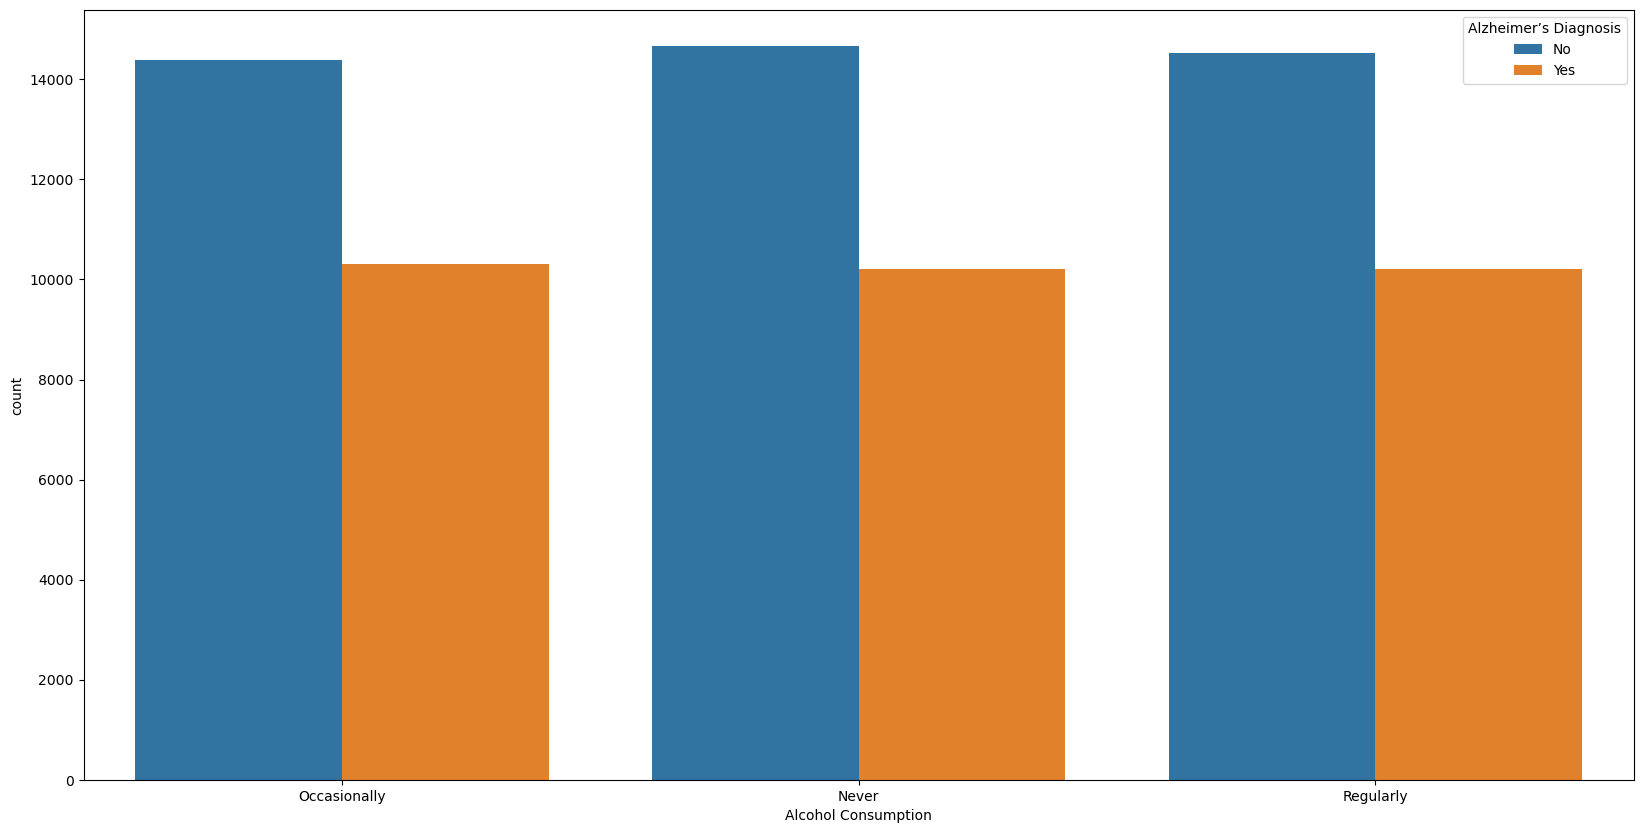

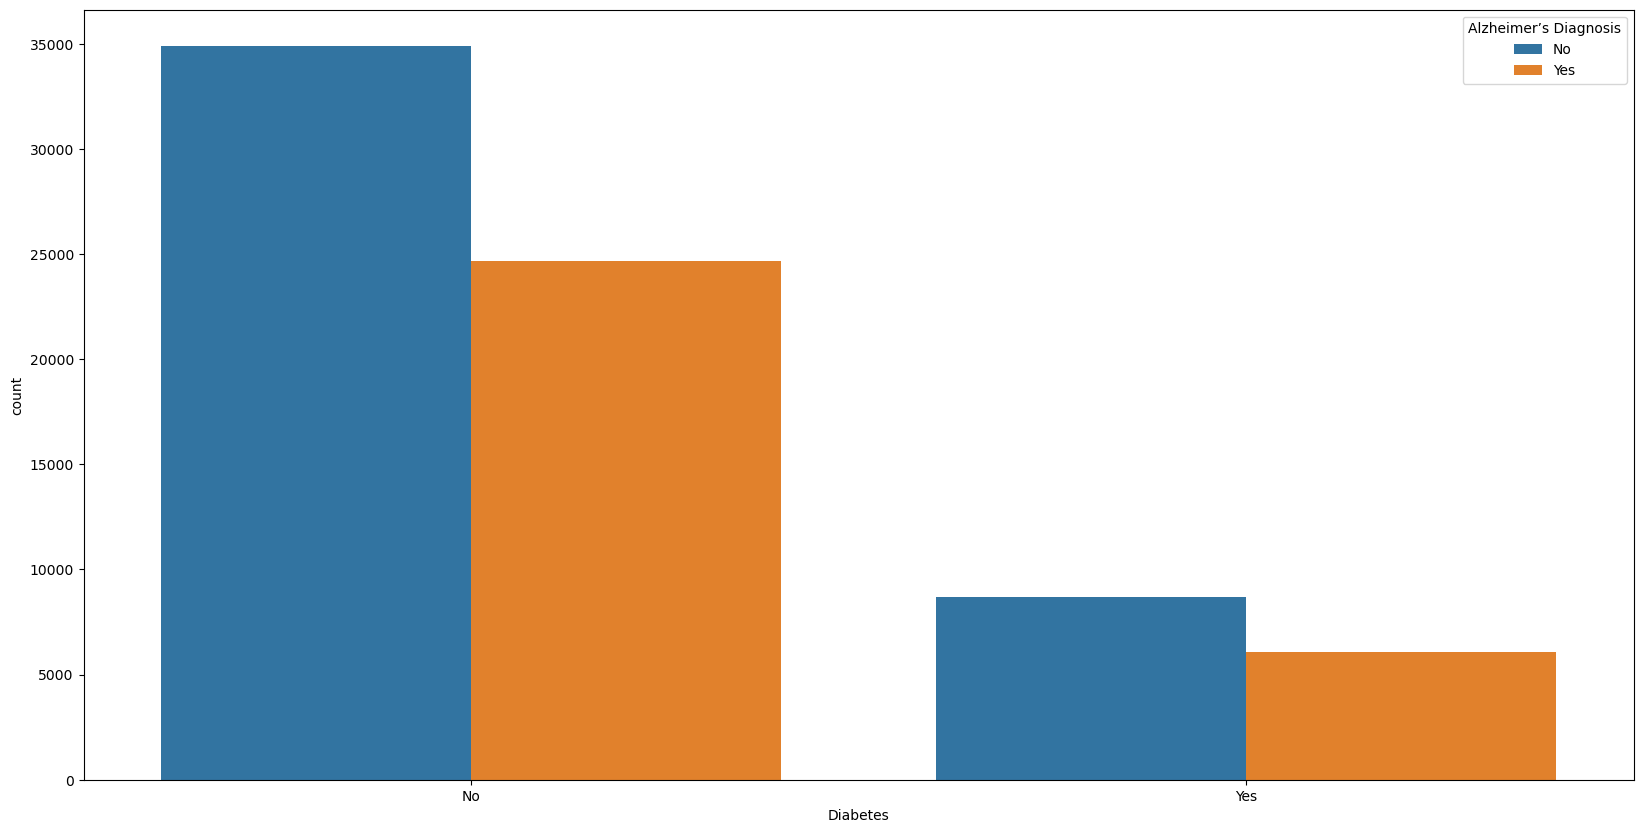

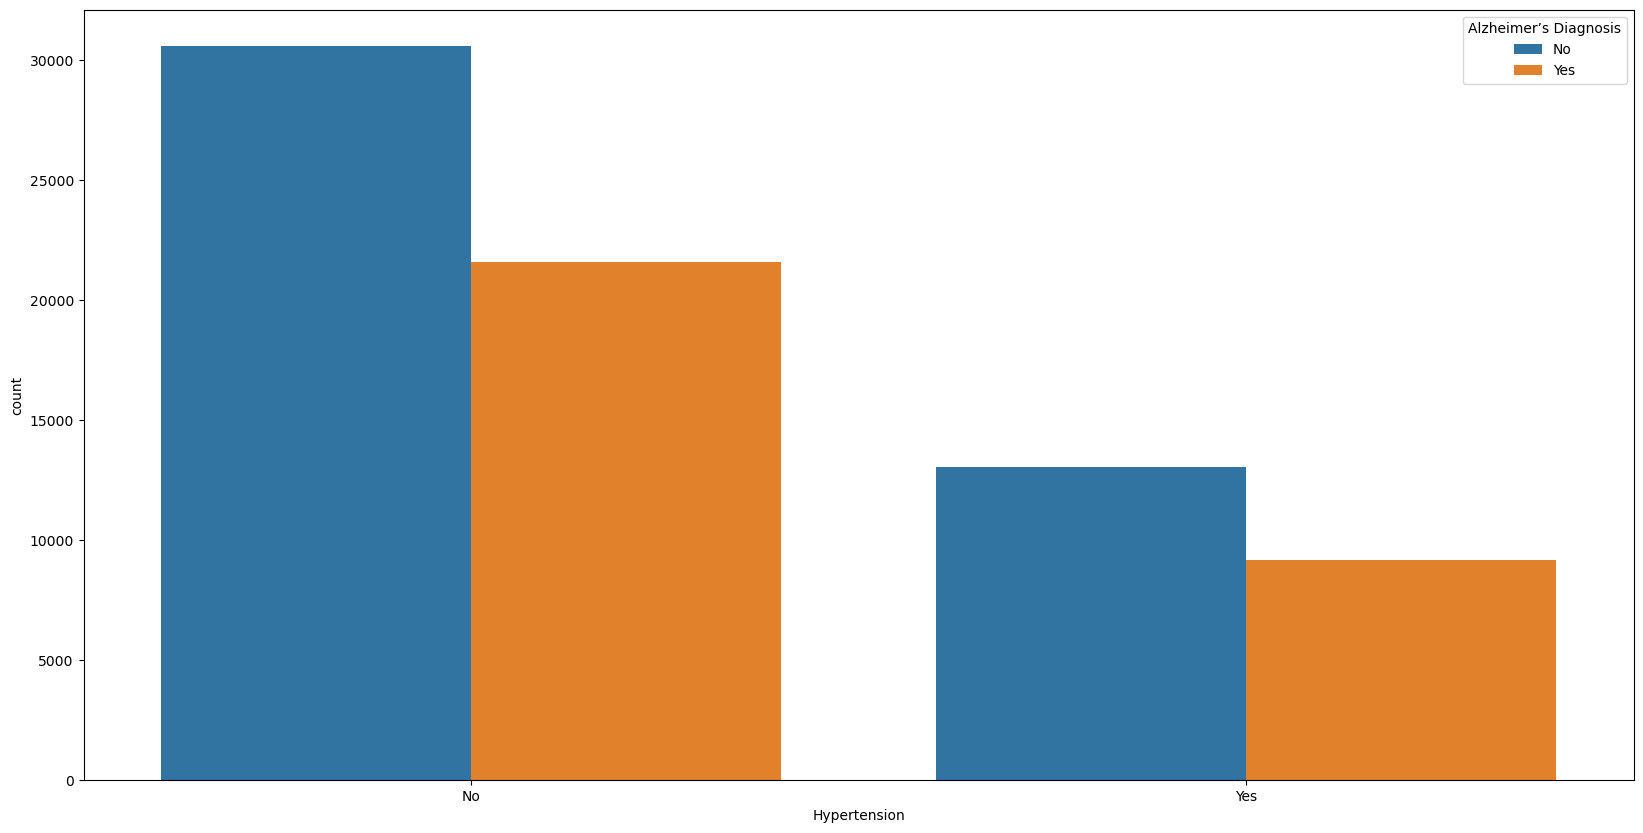

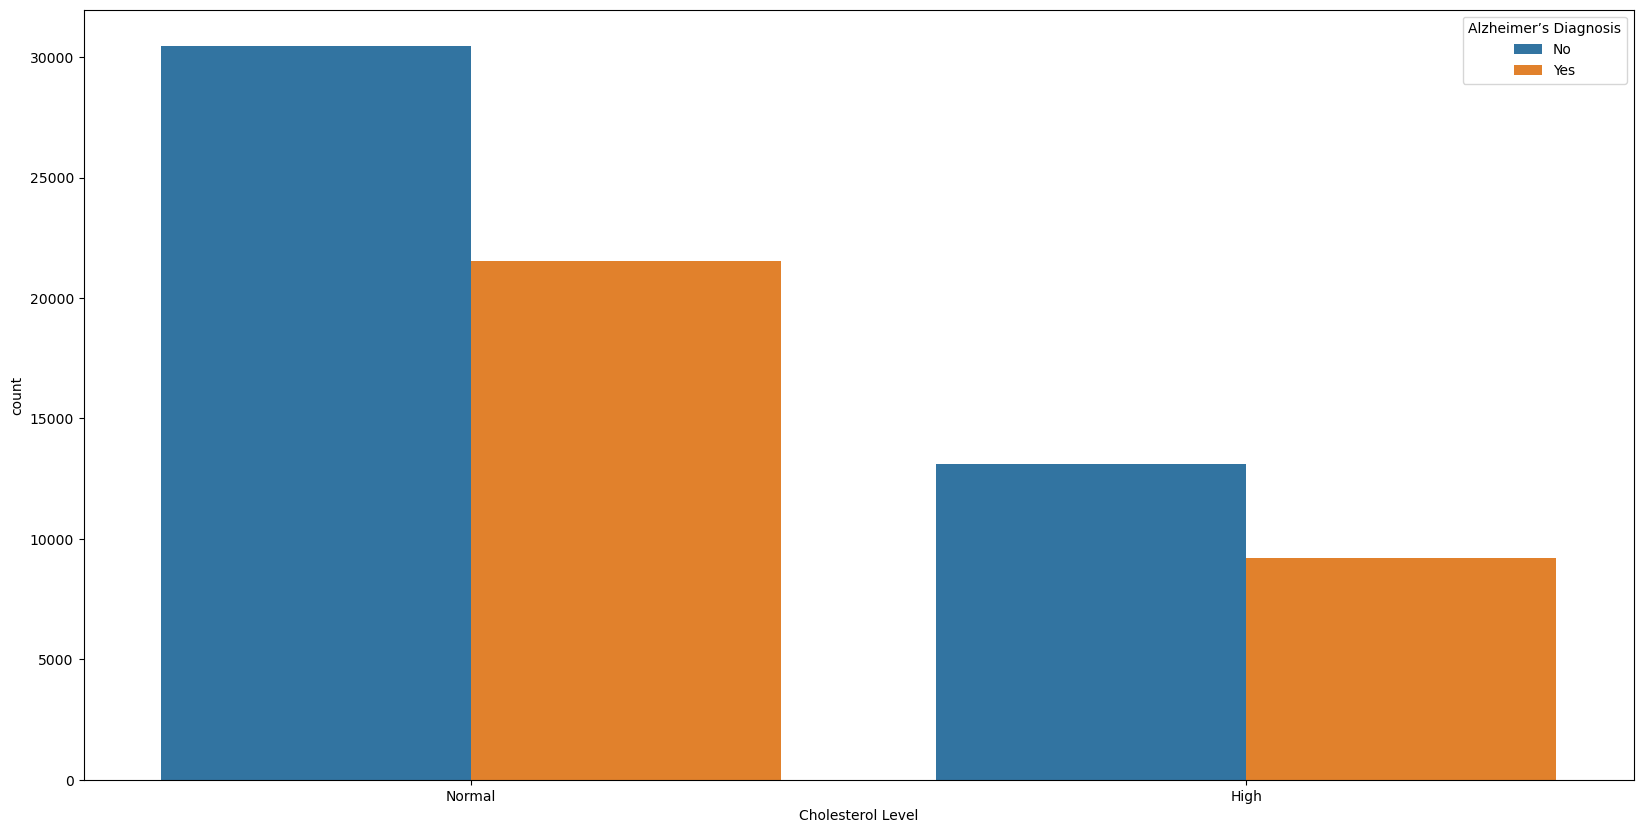

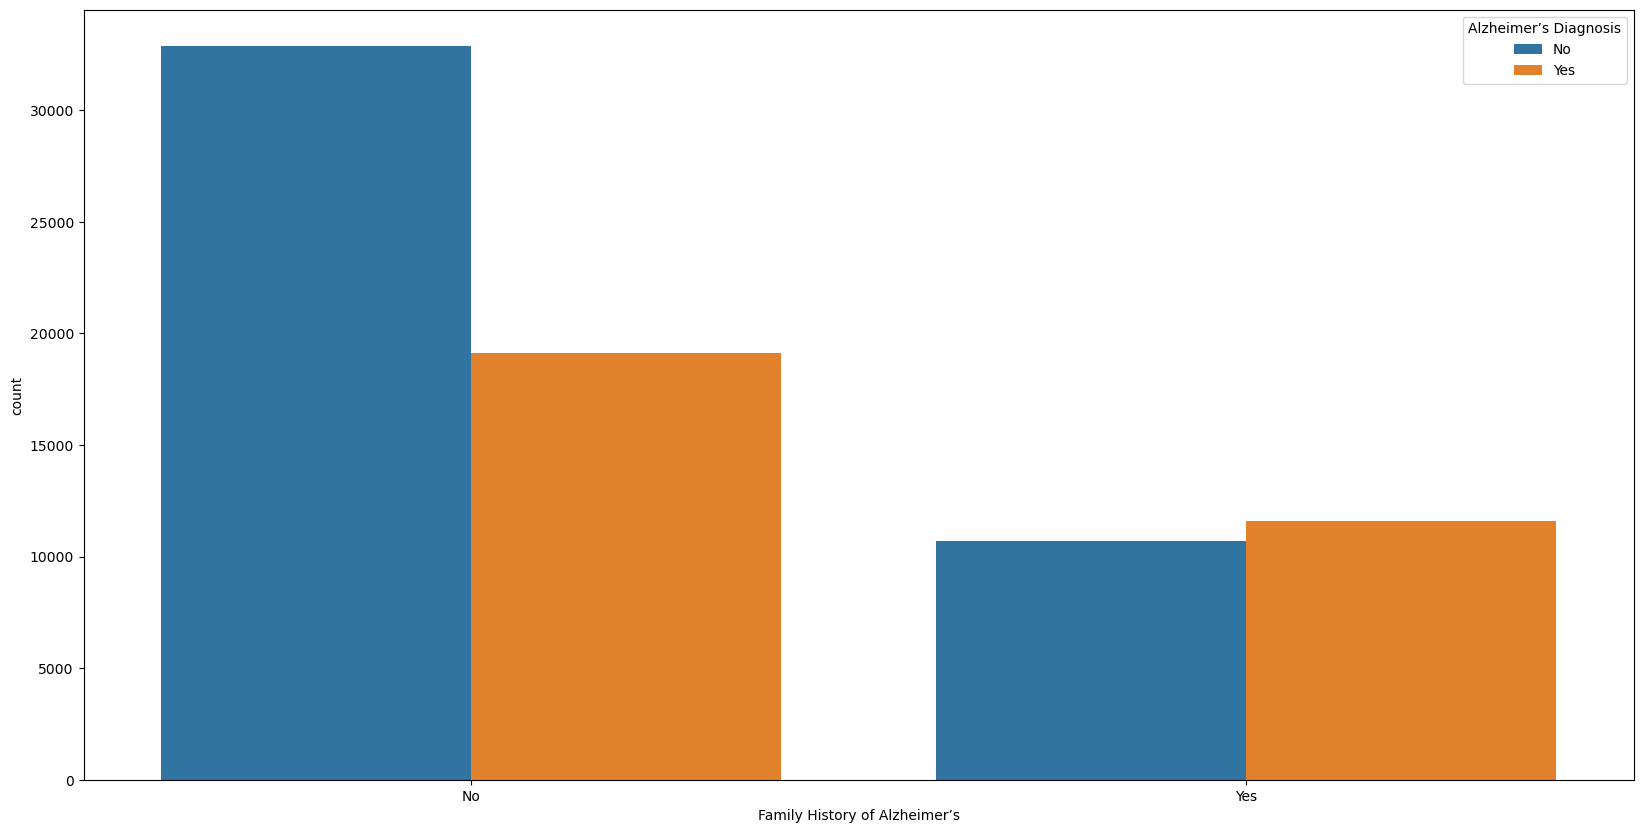

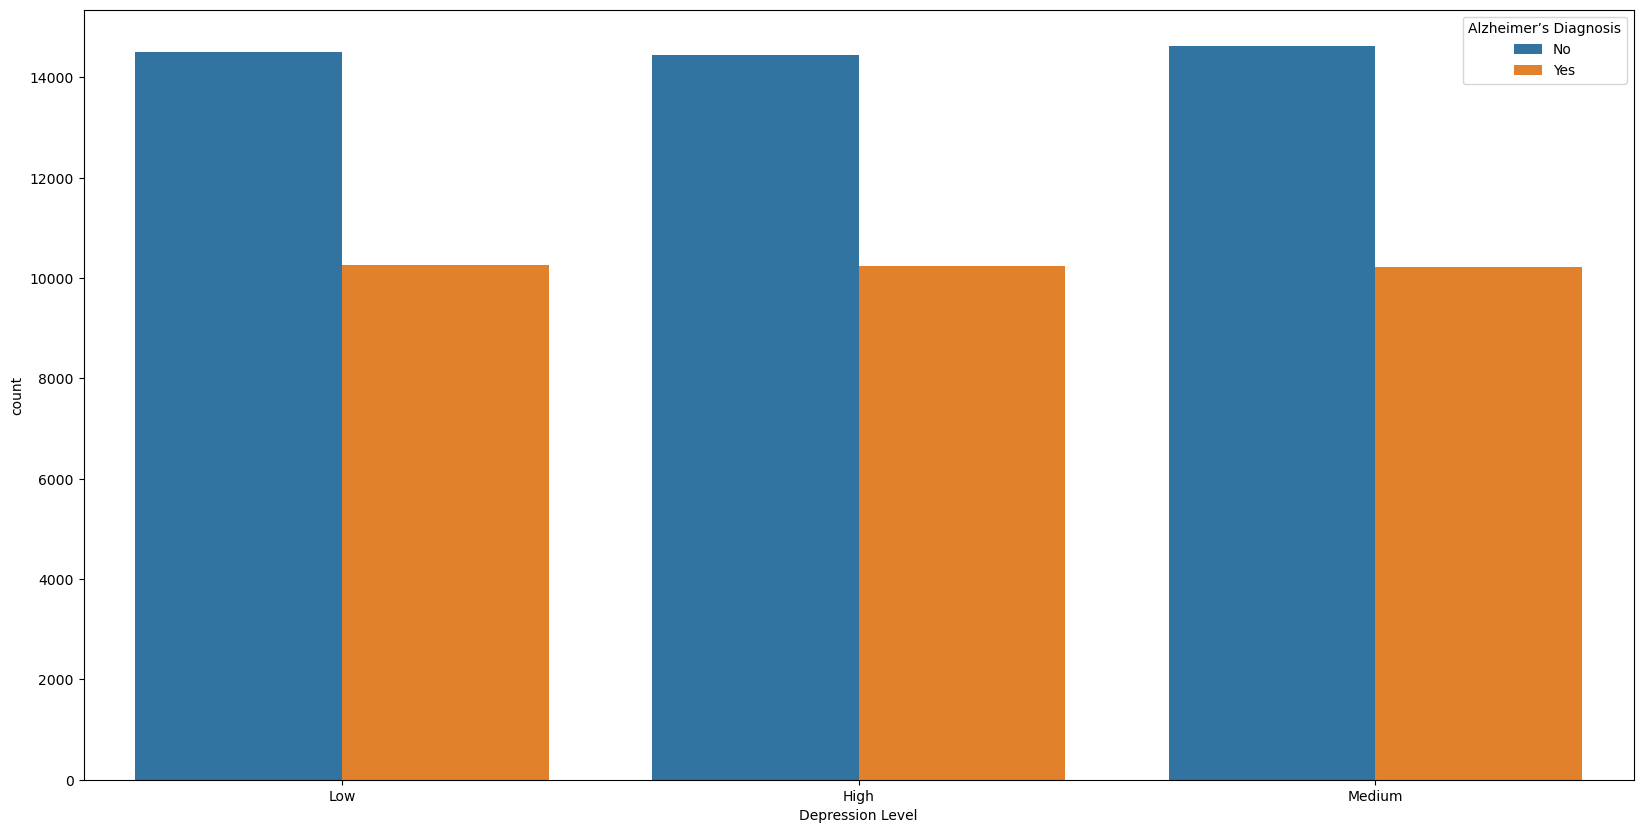

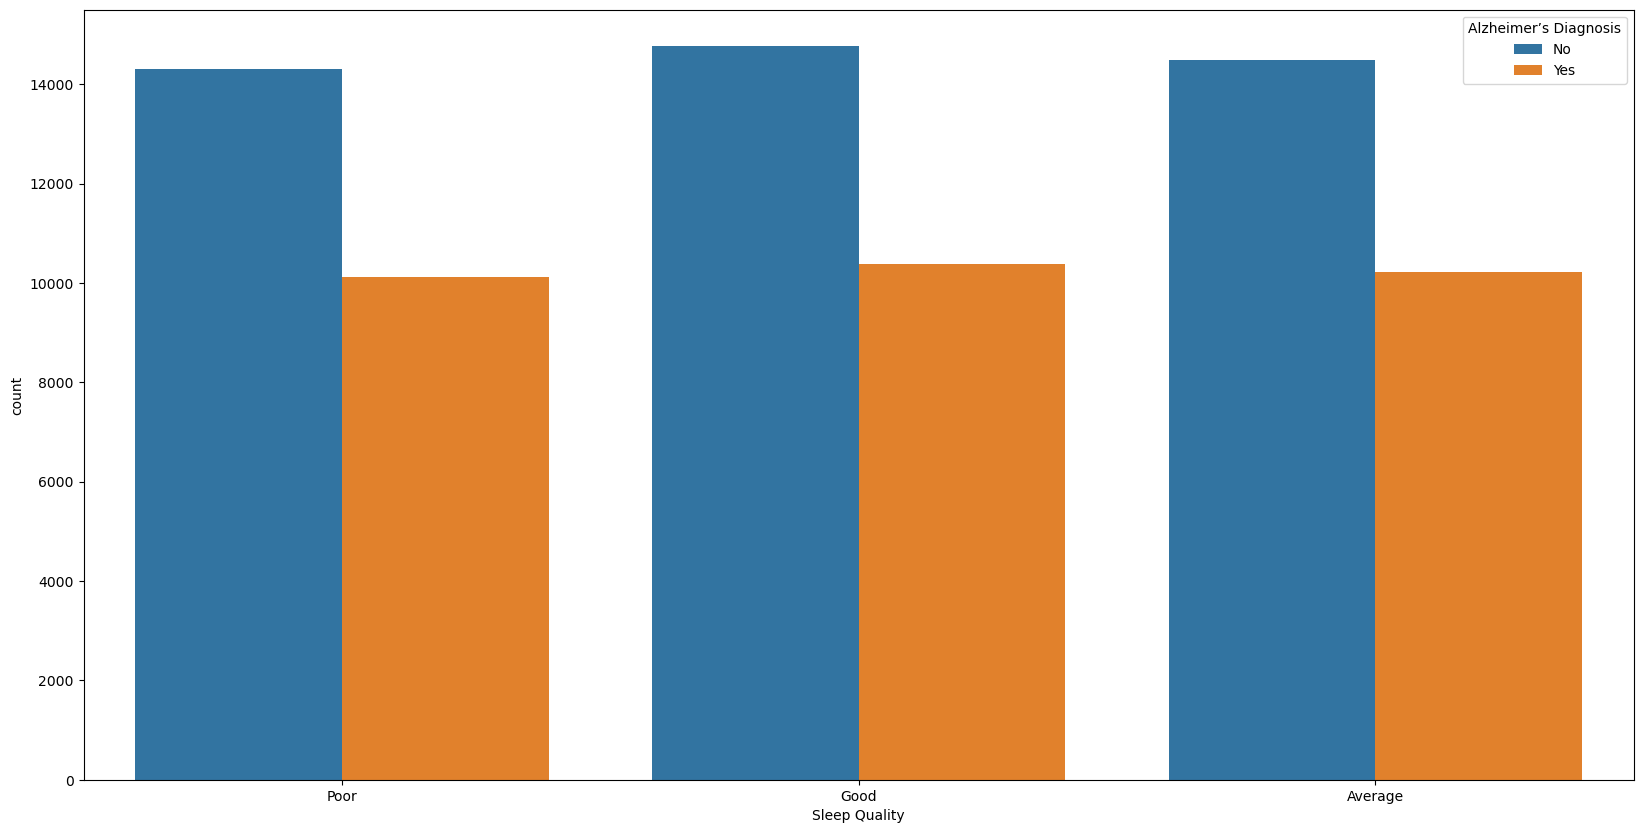

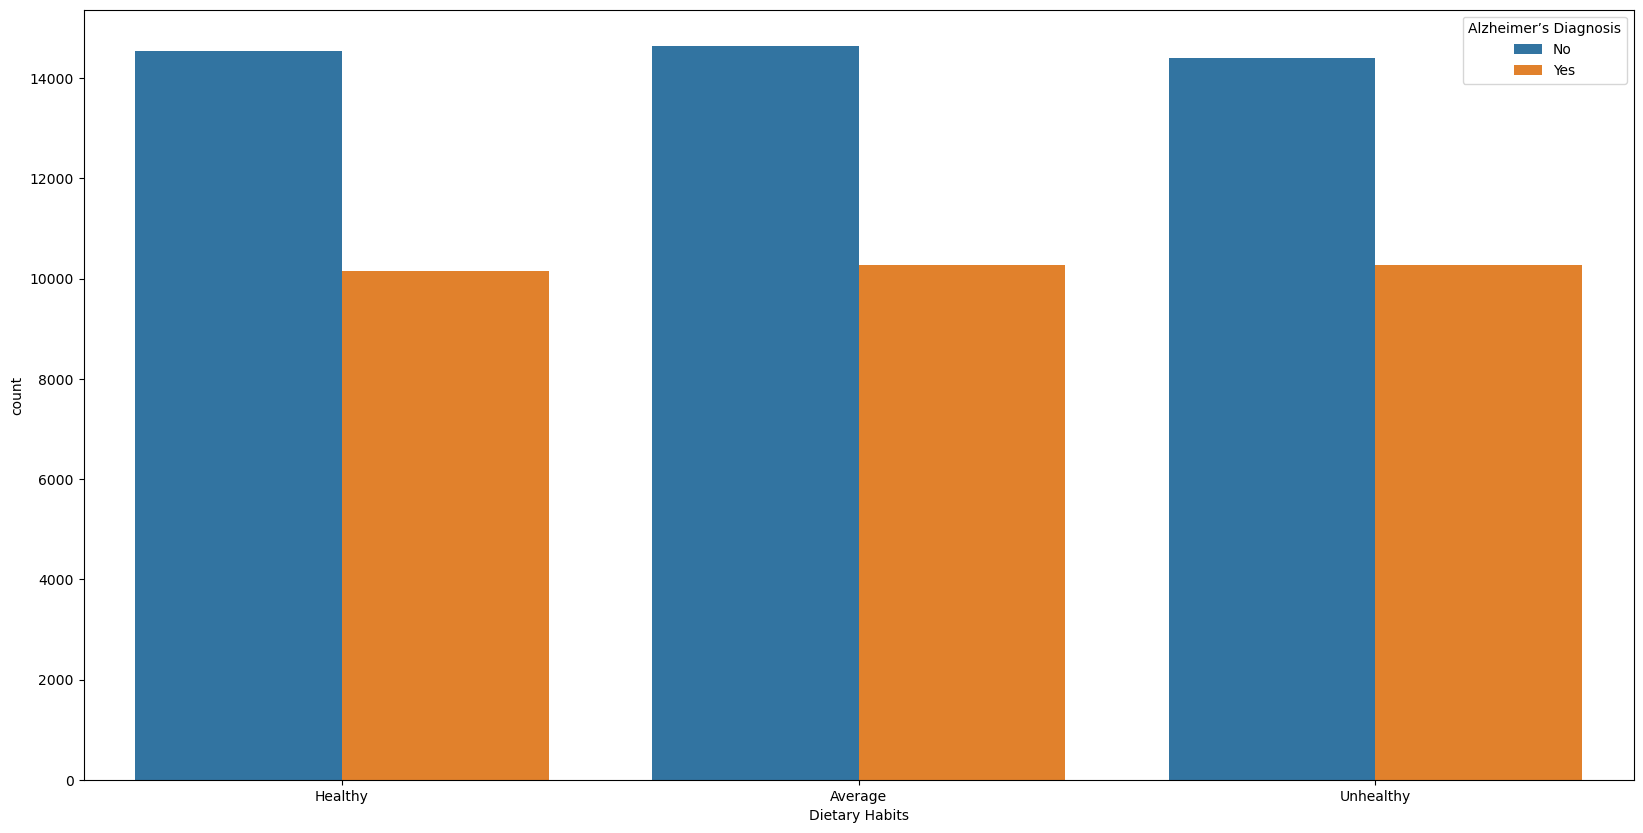

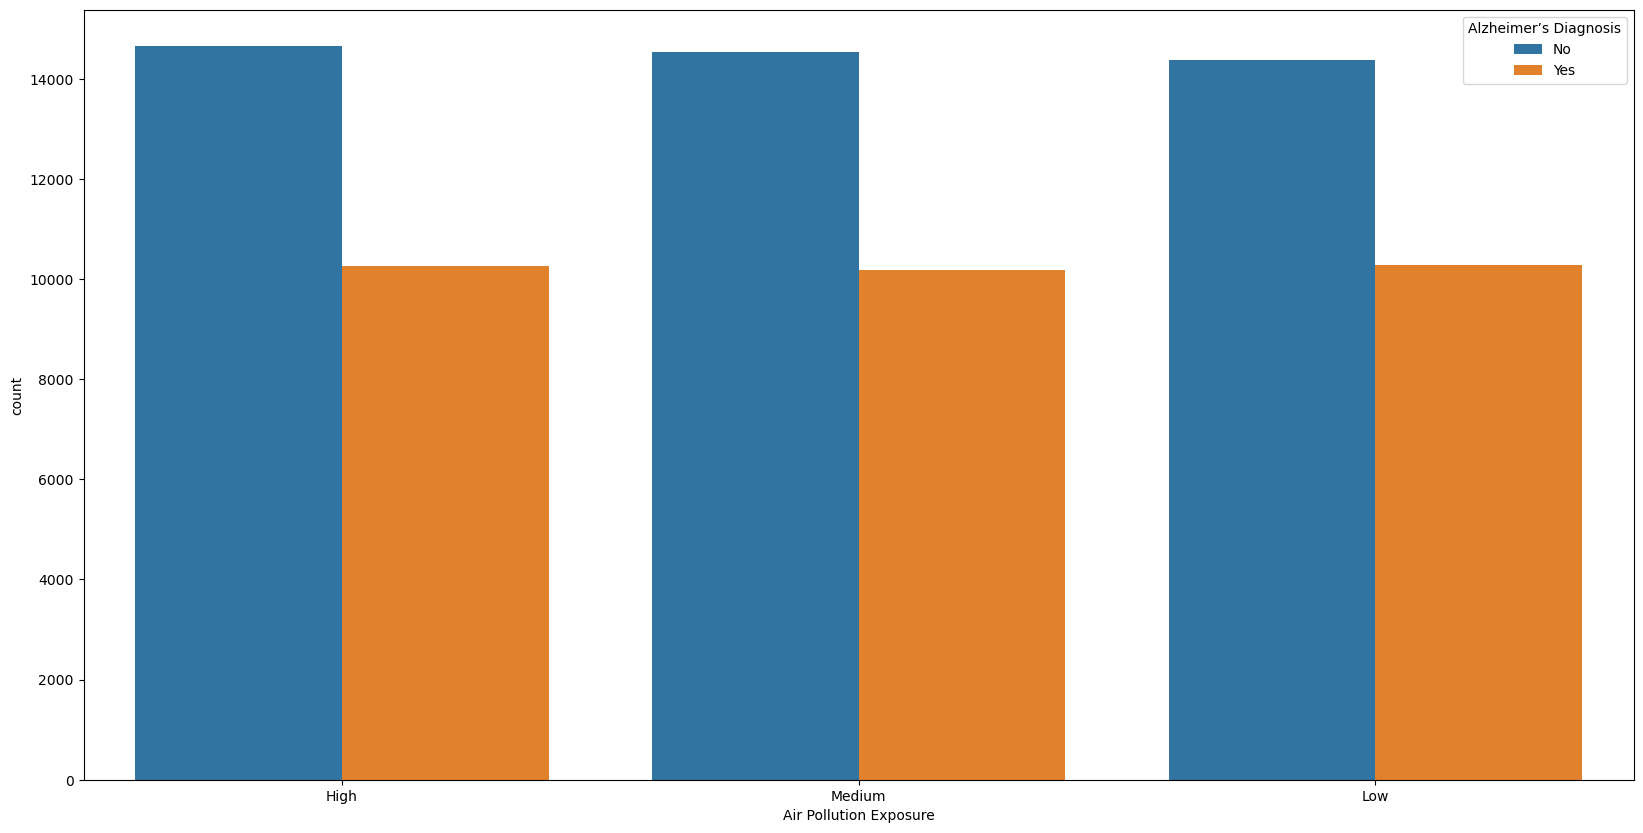

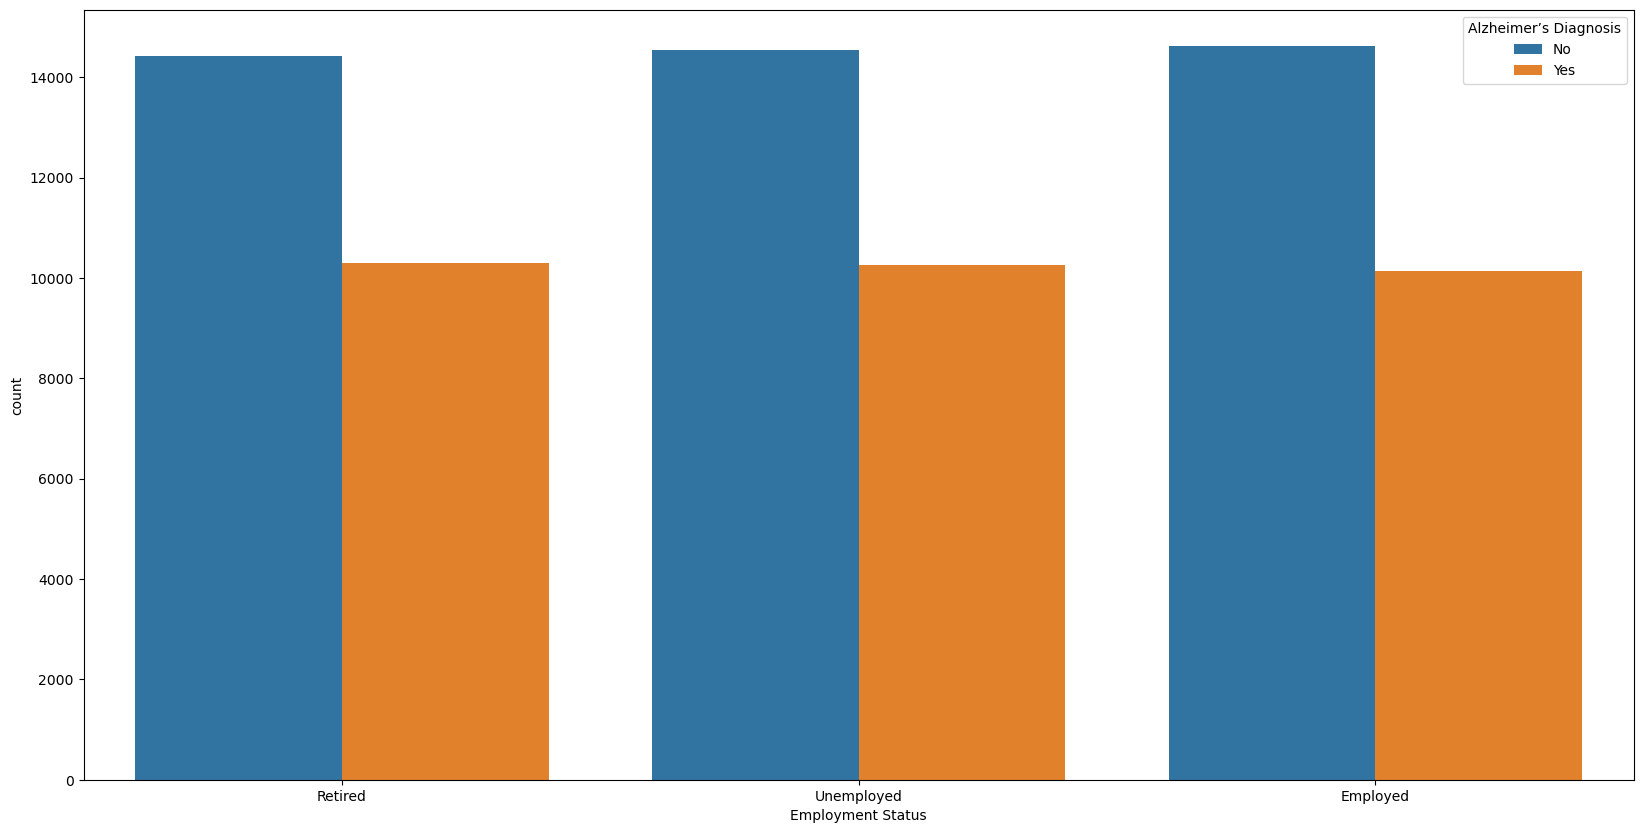

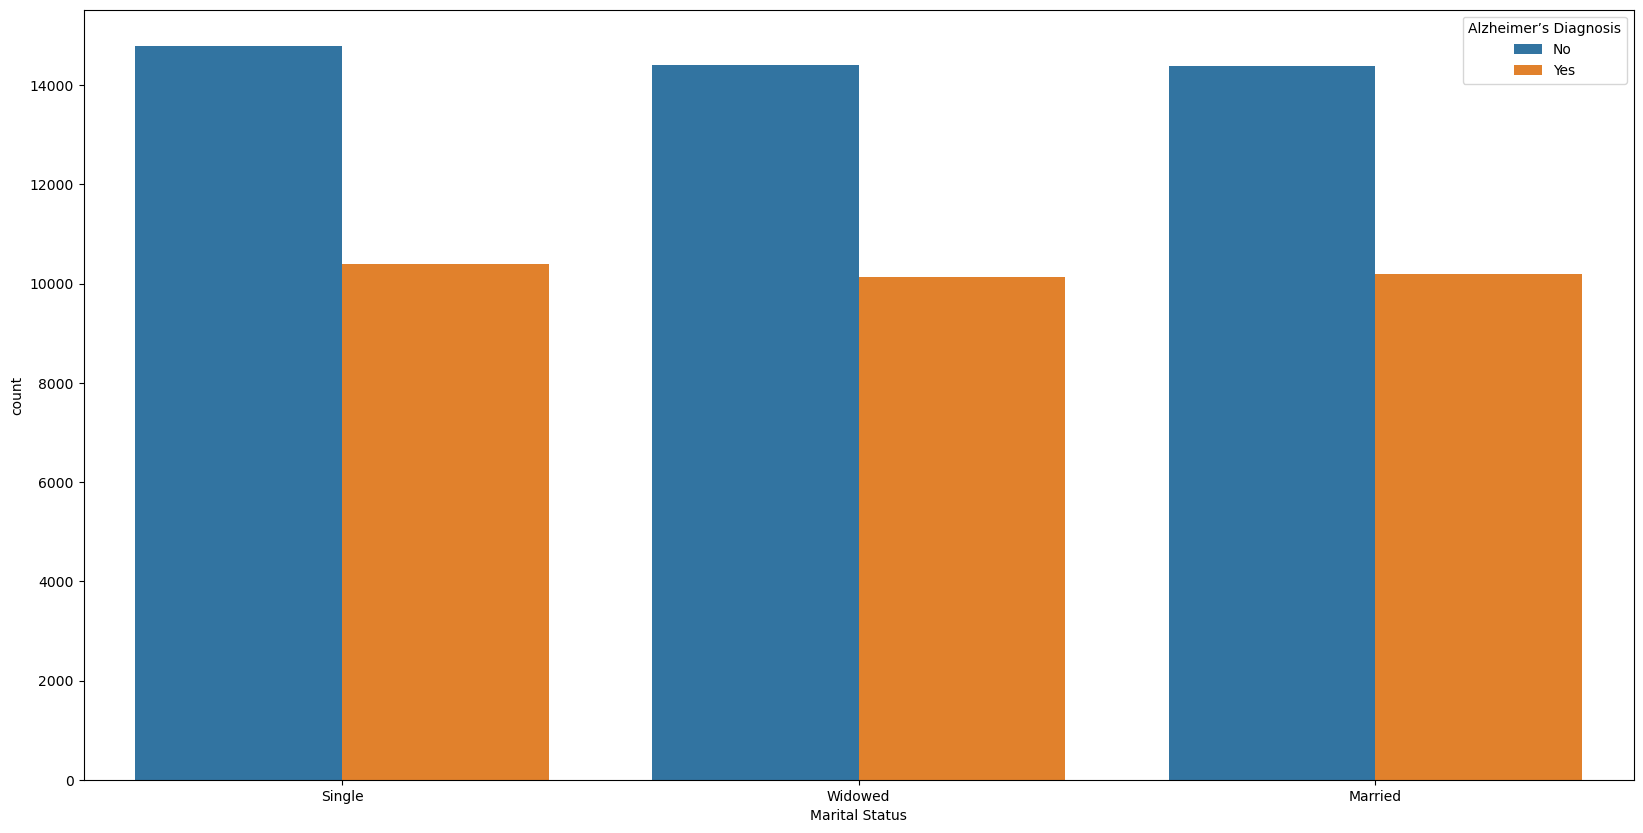

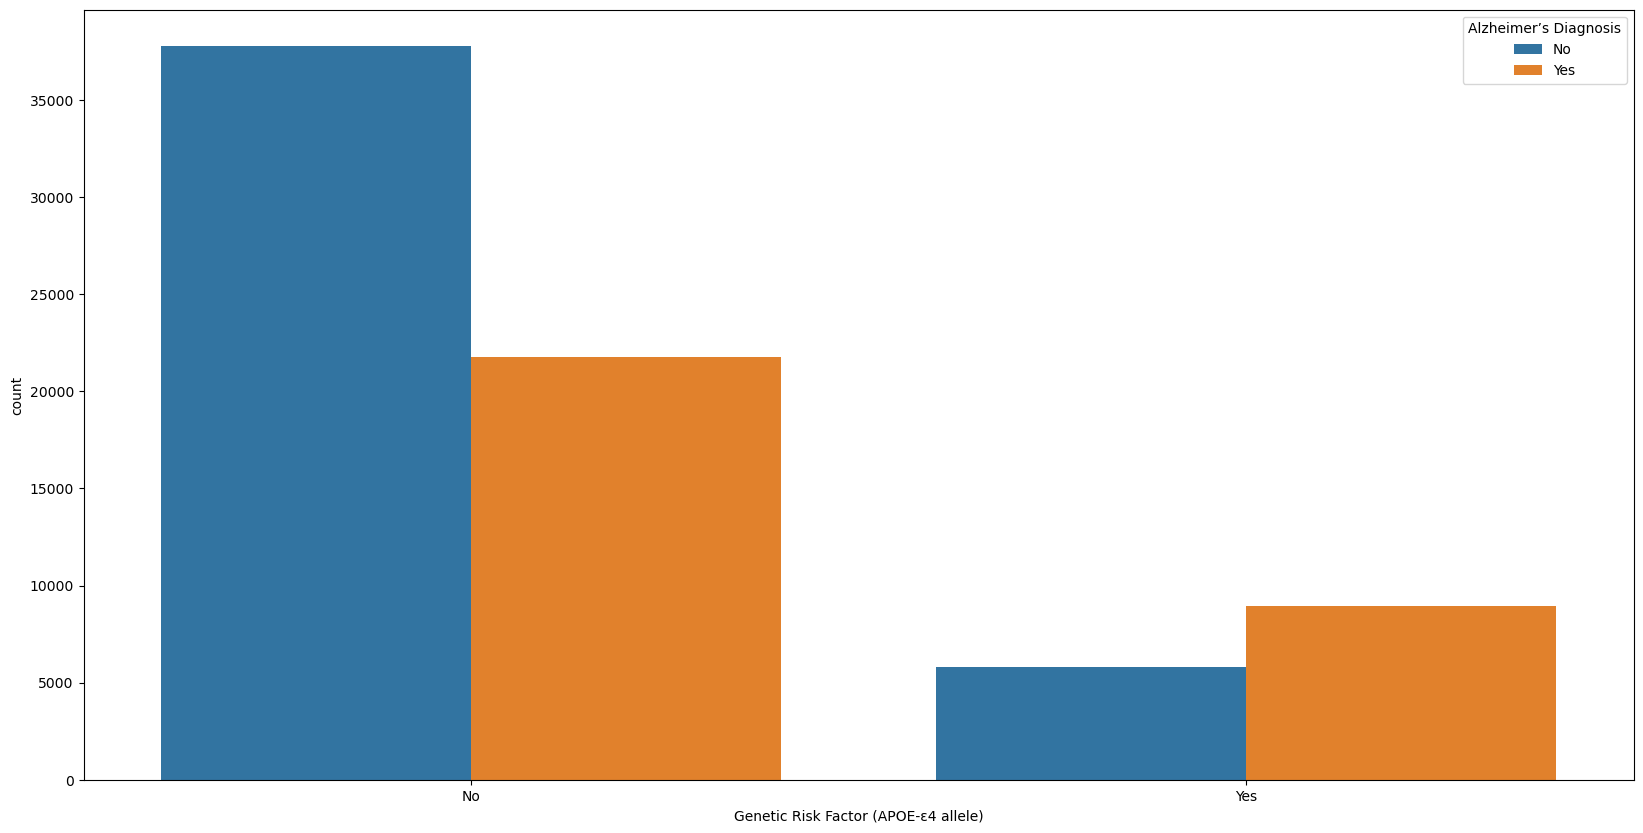

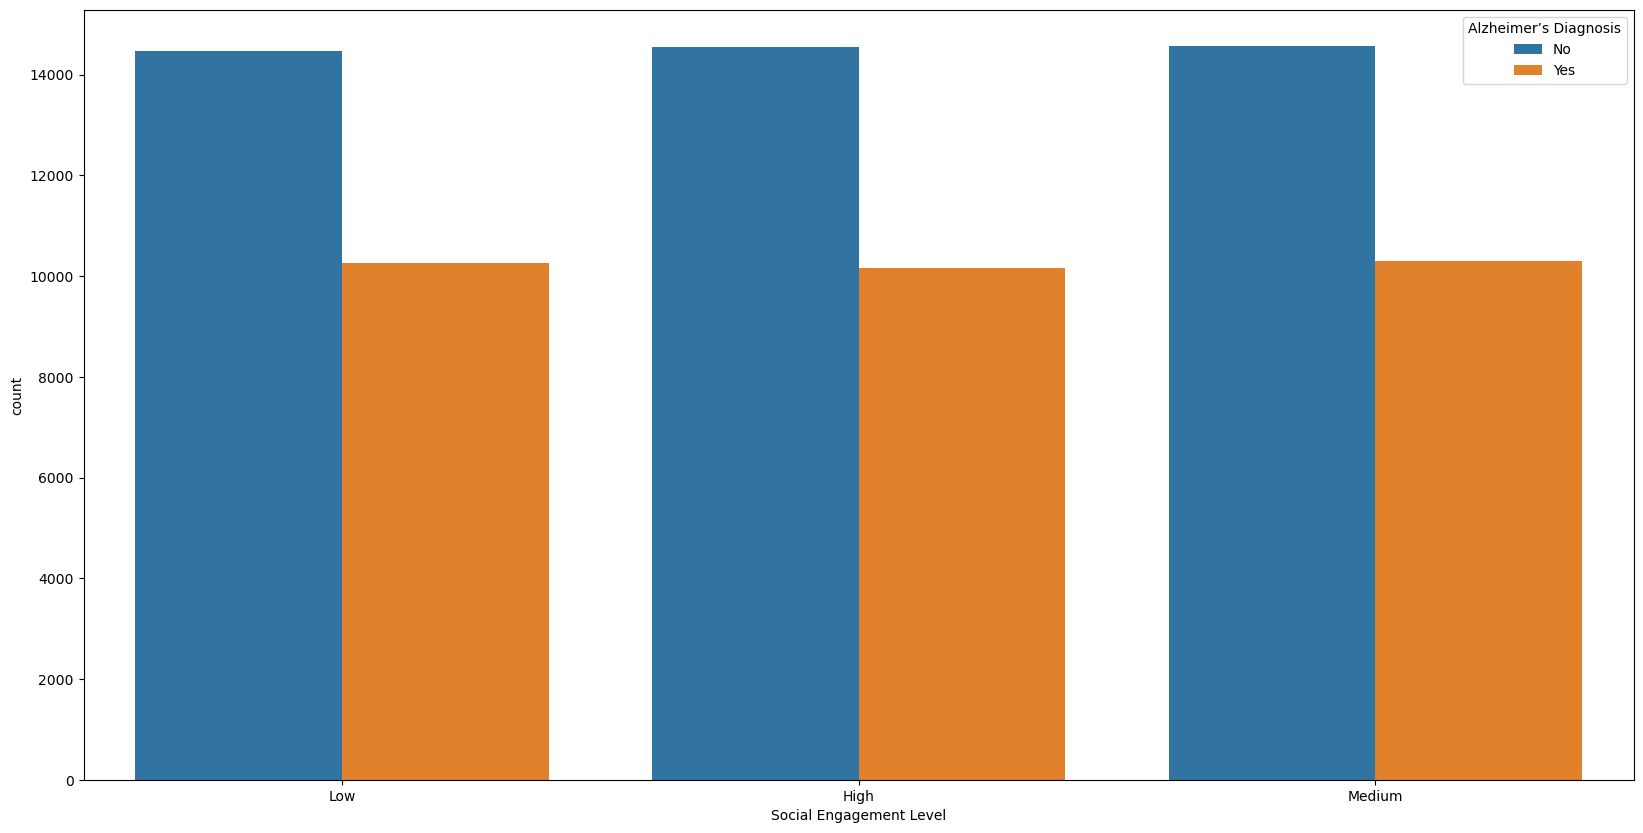

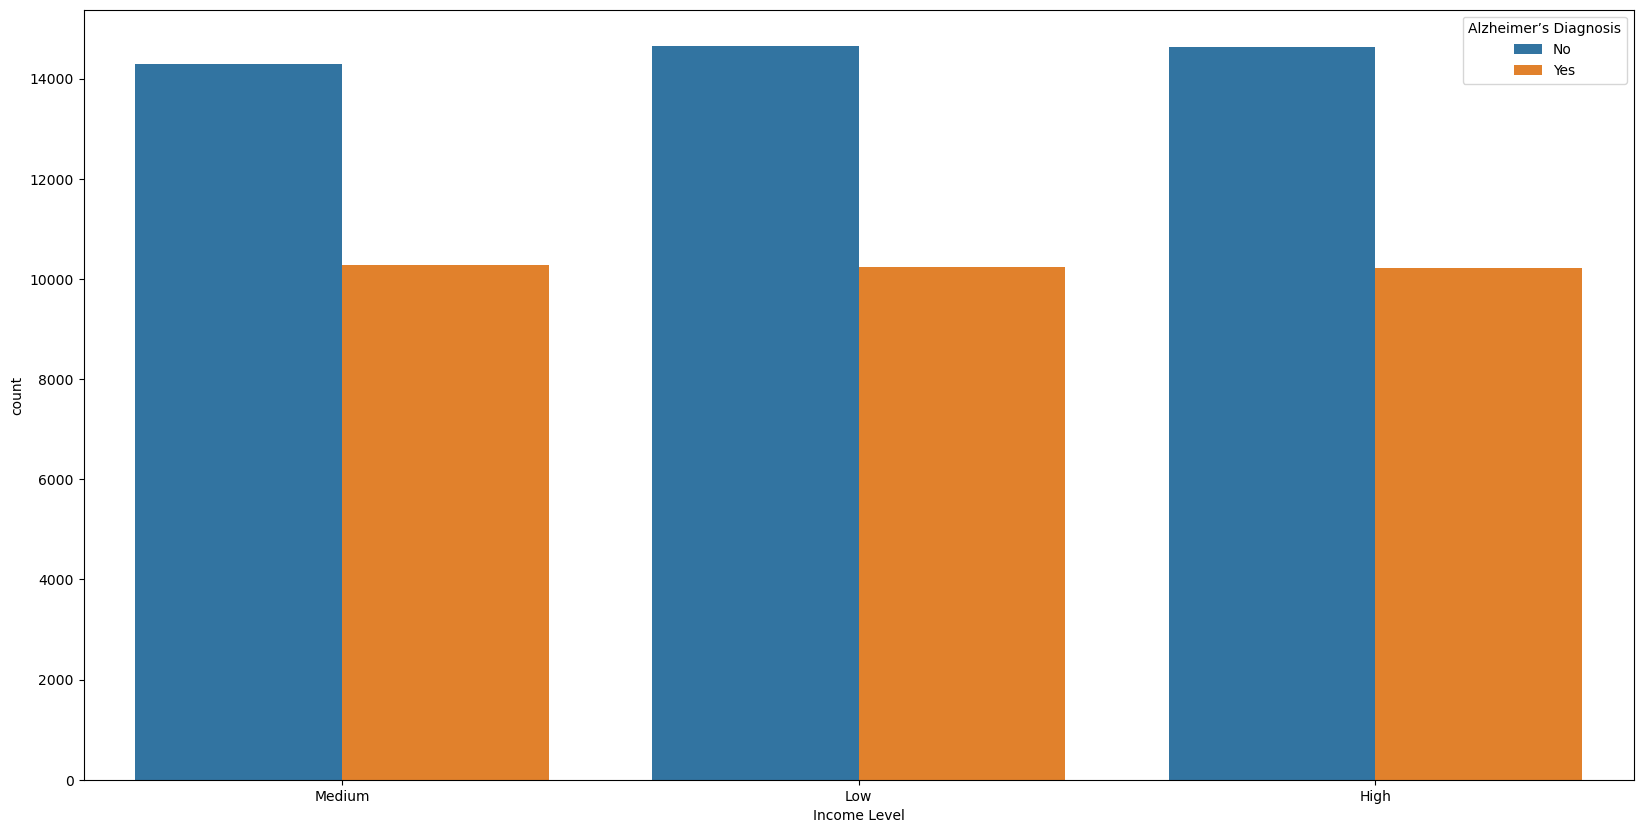

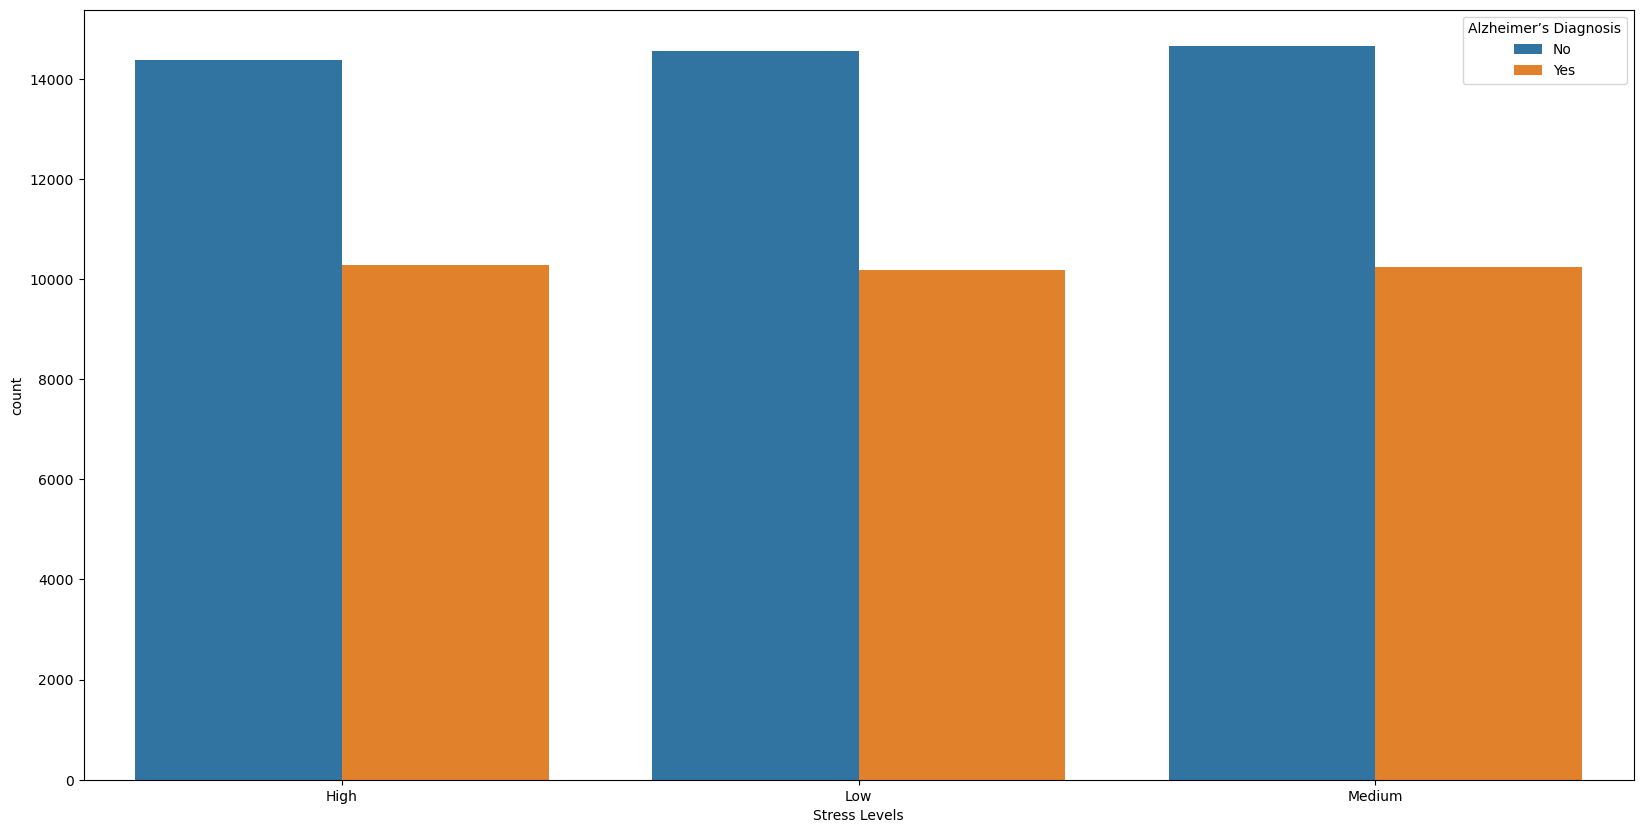

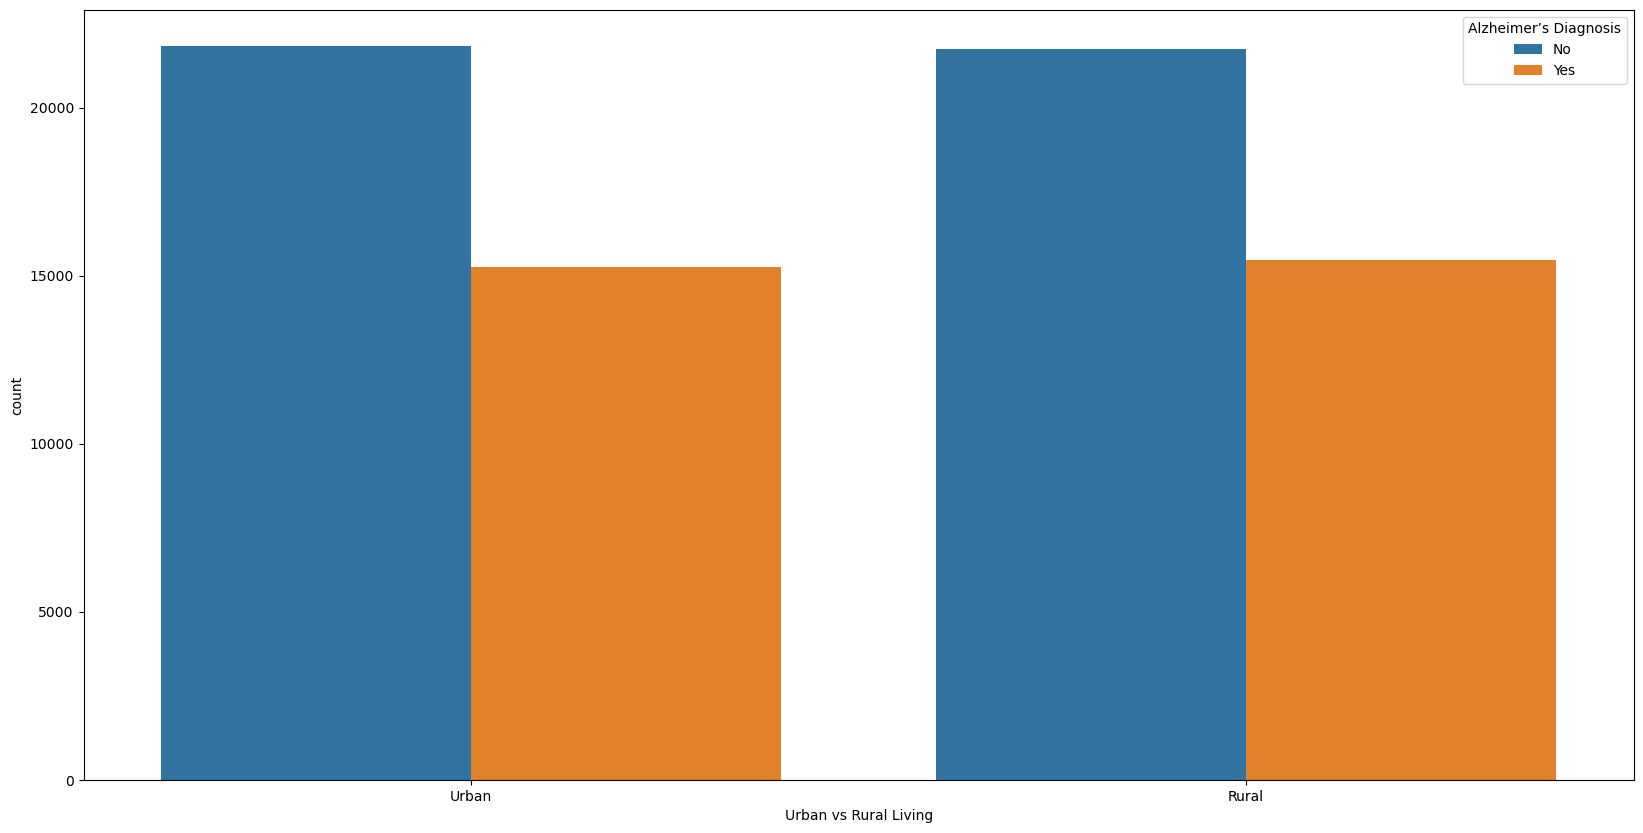

In [10]:
import seaborn as sns
for i in cat[:-1]:
    plt.figure(figsize=[20,10])
    sns.countplot(data=df,x=i,hue='Alzheimer’s Diagnosis',orient='h',width=0.8)
    plt.show()

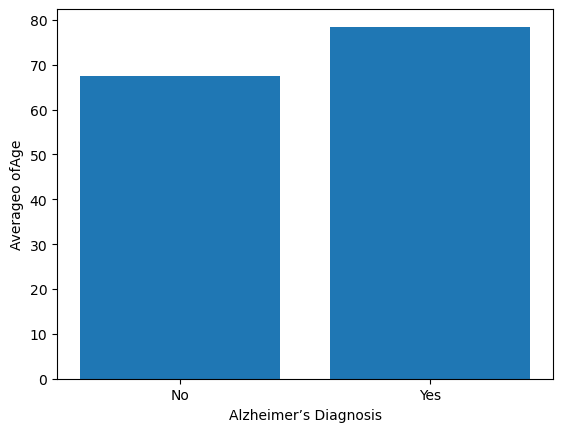

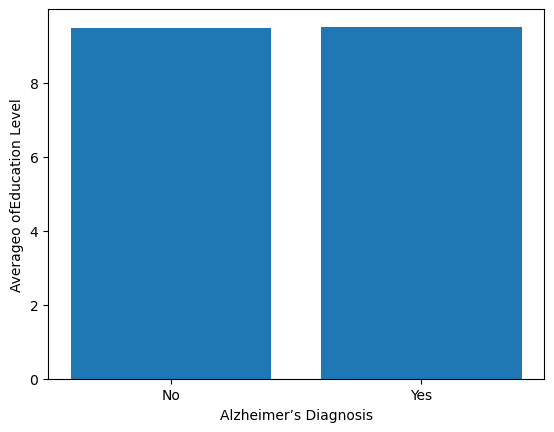

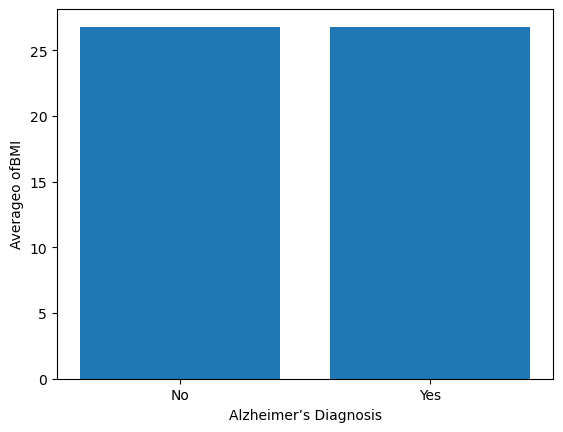

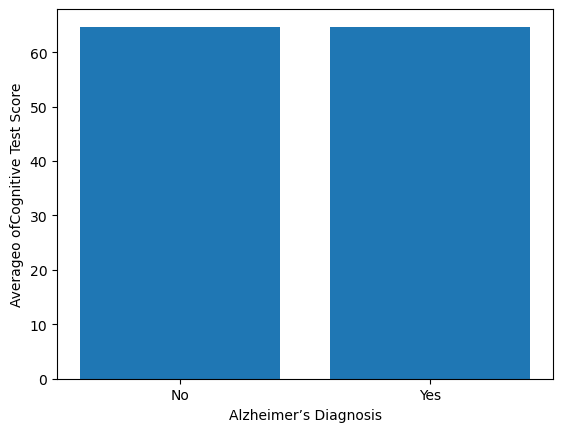

In [11]:
for i in num:
    gb=df.groupby('Alzheimer’s Diagnosis')[i].mean()
    plt.bar(x=gb.index,height=gb)
    plt.xlabel('Alzheimer’s Diagnosis')
    plt.ylabel("Averageo of" +str(i))
    plt.show()

In [12]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [13]:
df['Physical Activity Level'].value_counts()

Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64

In [14]:
df['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\1277379956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\1277379956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [15]:
df['Physical Activity Level'].replace(to_replace=['High','Medium','Low'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3005381040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical Activity Level'].replace(to_replace=['High','Medium','Low'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3005381040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
ohe_smoke=OneHotEncoder(sparse_output=False)
smoke_status=ohe_smoke.fit_transform(df[['Smoking Status']])
Smoke_Status=pd.DataFrame(smoke_status,columns=ohe_smoke.categories_)
Smoke_Status.drop('Current',axis=1,inplace=True)
Smoke_Status

,Former,Never
0,0.0,1.0
1,1.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
74278,1.0,0.0
74279,0.0,1.0
74280,0.0,1.0
74281,0.0,1.0


In [31]:
df['Alcohol Consumption'].replace(to_replace=['Regularly','Occasionally','Never'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\1917824075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol Consumption'].replace(to_replace=['Regularly','Occasionally','Never'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\1917824075.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [33]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [35]:
df['Hypertension'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3581385138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hypertension'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3581385138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [37]:
df['Smoking Status'].replace(to_replace=['Former','Current','Never'],value=[1,2,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3800699372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking Status'].replace(to_replace=['Former','Current','Never'],value=[1,2,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3800699372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [39]:
df



,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,1,1,33.0,1,0,1,No,0,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,1,7,29.9,1,1,0,No,0,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,0,19,22.9,2,2,1,No,1,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,1,17,31.2,0,0,2,Yes,0,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,0,3,30.0,2,1,0,Yes,0,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,1,0,No,0,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,1,18,30.6,0,0,1,Yes,0,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,0,13,28.2,1,0,2,No,0,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,0,7,29.0,0,0,2,No,0,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [41]:
ohe_country=OneHotEncoder(sparse_output=False)
country_df=ohe_country.fit_transform(df[['Country']])
country=pd.DataFrame(country_df,columns=ohe_country.categories_)
country.drop('China',axis=1,inplace=True)
country

,Argentina,Australia,Brazil,Canada,France,Germany,India,Italy,Japan,Mexico,Norway,Russia,Saudi Arabia,South Africa,South Korea,Spain,Sweden,UK,USA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74281,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df=pd.concat([df,country],axis=1)

In [45]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,"(Mexico,)","(Norway,)","(Russia,)","(Saudi Arabia,)","(South Africa,)","(South Korea,)","(Spain,)","(Sweden,)","(UK,)","(USA,)"
0,Spain,90,1,1,33.0,1,0,1,No,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Argentina,72,1,7,29.9,1,1,0,No,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,South Africa,86,0,19,22.9,2,2,1,No,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,China,53,1,17,31.2,0,0,2,Yes,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sweden,58,0,3,30.0,2,1,0,Yes,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,1,0,No,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74279,UK,58,1,18,30.6,0,0,1,Yes,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74280,Spain,57,0,13,28.2,1,0,2,No,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74281,Brazil,73,0,7,29.0,0,0,2,No,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
ohe_es=OneHotEncoder(sparse_output=False)
empl_stat_df=ohe_es.fit_transform(df[['Employment Status']])
empl_stat=pd.DataFrame(empl_stat_df,columns=ohe_es.categories_)
empl_stat.drop('Employed',axis=1,inplace=True)
empl_stat

,Retired,Unemployed
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
74278,0.0,1.0
74279,0.0,1.0
74280,0.0,0.0
74281,0.0,0.0


In [49]:
df=pd.concat([df,empl_stat],axis=1)

In [51]:
ohe_marital=OneHotEncoder(sparse_output=False)
marital_stat=ohe_marital.fit_transform(df[['Marital Status']])
marital_stat_df=pd.DataFrame(marital_stat,columns=ohe_marital.categories_)
marital_stat_df.drop('Married',axis=1,inplace=True)
marital_stat_df

,Single,Widowed
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
74278,0.0,1.0
74279,1.0,0.0
74280,1.0,0.0
74281,0.0,1.0


In [53]:
df=pd.concat([df,marital_stat_df],axis=1)

In [55]:
df['Cholesterol Level'].replace(to_replace=['Normal','High'],value=[0,1],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\2644917685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol Level'].replace(to_replace=['Normal','High'],value=[0,1],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\2644917685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [117]:
df['Diabetes'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\2361140323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diabetes'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\2361140323.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [119]:
df['Genetic Risk Factor (APOE-ε4 allele)'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\389766183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genetic Risk Factor (APOE-ε4 allele)'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\389766183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [57]:
df['Family History of Alzheimer’s'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\2080811147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family History of Alzheimer’s'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\2080811147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [59]:
df.columns

Index([                             'Country',
                                        'Age',
                                     'Gender',
                            'Education Level',
                                        'BMI',
                    'Physical Activity Level',
                             'Smoking Status',
                        'Alcohol Consumption',
                                   'Diabetes',
                               'Hypertension',
                          'Cholesterol Level',
              'Family History of Alzheimer’s',
                       'Cognitive Test Score',
                           'Depression Level',
                              'Sleep Quality',
                             'Dietary Habits',
                     'Air Pollution Exposure',
                          'Employment Status',
                             'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)',
                    'Social Engagement Level',
             

In [61]:
df['Depression Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3292459735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Depression Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3292459735.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [63]:
df['Sleep Quality'].replace(to_replace=['Good','Average','Poor'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\837484534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Quality'].replace(to_replace=['Good','Average','Poor'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\837484534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [65]:
df['Dietary Habits'].replace(to_replace=['Healthy','Average','Unhealthy'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\4136025851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dietary Habits'].replace(to_replace=['Healthy','Average','Unhealthy'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\4136025851.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

In [67]:
df['Air Pollution Exposure'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\330924400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Air Pollution Exposure'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\330924400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [69]:
df['Social Engagement Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\118576739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Social Engagement Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\118576739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [71]:
df['Income Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\167890773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\167890773.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [73]:
df['Stress Levels'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3268337187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stress Levels'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3268337187.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [75]:
df['Urban vs Rural Living'].replace(to_replace=['Rural','Urban'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\780395937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Urban vs Rural Living'].replace(to_replace=['Rural','Urban'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\780395937.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [77]:
df["Alzheimer’s Diagnosis"].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3283234512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alzheimer’s Diagnosis"].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_25616\3283234512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [79]:
df.columns

Index([                             'Country',
                                        'Age',
                                     'Gender',
                            'Education Level',
                                        'BMI',
                    'Physical Activity Level',
                             'Smoking Status',
                        'Alcohol Consumption',
                                   'Diabetes',
                               'Hypertension',
                          'Cholesterol Level',
              'Family History of Alzheimer’s',
                       'Cognitive Test Score',
                           'Depression Level',
                              'Sleep Quality',
                             'Dietary Habits',
                     'Air Pollution Exposure',
                          'Employment Status',
                             'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)',
                    'Social Engagement Level',
             

In [121]:
X_df=df.drop(['Country','Employment Status','Marital Status','Alzheimer’s Diagnosis'],axis=1)
y=df['Alzheimer’s Diagnosis']

In [123]:
X=X_df.values

In [125]:
X

array([[90.,  1.,  1., ...,  0.,  1.,  0.],
       [72.,  1.,  7., ...,  1.,  0.,  1.],
       [86.,  0., 19., ...,  0.,  1.,  0.],
       ...,
       [57.,  0., 13., ...,  0.,  1.,  0.],
       [73.,  0.,  7., ...,  0.,  0.,  1.],
       [57.,  0.,  1., ...,  1.,  1.,  0.]])

In [127]:
Y=y.values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,"(South Africa,)","(South Korea,)","(Spain,)","(Sweden,)","(UK,)","(USA,)","(Retired,)","(Unemployed,)","(Single,)","(Widowed,)"
0,Spain,90,1,1,33.0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Argentina,72,1,7,29.9,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,South Africa,86,0,19,22.9,2,2,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,China,53,1,17,31.2,0,0,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Sweden,58,0,3,30.0,2,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
74279,UK,58,1,18,30.6,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
74280,Spain,57,0,13,28.2,1,0,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74281,Brazil,73,0,7,29.0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51998, 44)
(22285, 44)
(51998,)
(22285,)


In [135]:
X_df

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,"(South Africa,)","(South Korea,)","(Spain,)","(Sweden,)","(UK,)","(USA,)","(Retired,)","(Unemployed,)","(Single,)","(Widowed,)"
0,90,1,1,33.0,1,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,72,1,7,29.9,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,86,0,19,22.9,2,2,1,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,1,17,31.2,0,0,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,58,0,3,30.0,2,1,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,0,3,22.6,2,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
74279,58,1,18,30.6,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
74280,57,0,13,28.2,1,0,2,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74281,73,0,7,29.0,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Logistic Regression 


In [137]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


C:\Users\Sarthak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix
print("Model Performance: ")
print("Training accuracy: ",accuracy_score (y_train,y_train_pred))
print("Training precision: ", precision_score(y_train, y_train_pred))
print("Training recall: ", recall_score(y_train, y_train_pred))
print("Training confusion matrix: ",confusion_matrix(y_train, y_train_pred))
print("Training classification report: ",classification_report(y_train, y_train_pred))

Model Performance: 
Training accuracy:  0.7093542059309973
Training precision:  0.6675513921415561
Training recall:  0.5951651818856719
Training confusion matrix:  [[24058  6388]
 [ 8725 12827]]
Training classification report:                precision    recall  f1-score   support

           0       0.73      0.79      0.76     30446
           1       0.67      0.60      0.63     21552

    accuracy                           0.71     51998
   macro avg       0.70      0.69      0.70     51998
weighted avg       0.71      0.71      0.71     51998



In [141]:
print("Model Performance: ")
print("Testing accuracy: ",accuracy_score (y_test,y_test_pred))
print("Testing precision: ", precision_score(y_test, y_test_pred))
print("Testing recall: ", recall_score(y_test, y_test_pred))
print("Testing confusion matrix: ",confusion_matrix(y_test, y_test_pred))
print("Testing classification report: ",classification_report(y_test, y_test_pred))

Model Performance: 
Testing accuracy:  0.7116894772268342
Testing precision:  0.665938864628821
Testing recall:  0.5992795546337736
Testing confusion matrix:  [[10370  2754]
 [ 3671  5490]]
Testing classification report:                precision    recall  f1-score   support

           0       0.74      0.79      0.76     13124
           1       0.67      0.60      0.63      9161

    accuracy                           0.71     22285
   macro avg       0.70      0.69      0.70     22285
weighted avg       0.71      0.71      0.71     22285



## KNN Algorithm

In [149]:
from sklearn.neighbors import KNeighborsClassifier


In [151]:
knn_model=KNeighborsClassifier(5)
knn_model.fit(X_train,y_train)
ytrain_knn_predicted=knn_model.predict(X_train)
ytrain_knn_predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [153]:
y_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [157]:
print("Model Performance: ")
print("Training accuracy: ",accuracy_score (y_train,ytrain_knn_predicted))
print("Training precision: ", precision_score(y_train, ytrain_knn_predicted))
print("Training recall: ", recall_score(y_train, ytrain_knn_predicted))
print("Training confusion matrix: ",confusion_matrix(y_train, ytrain_knn_predicted))
print("Training classification report: ",classification_report(y_train, ytrain_knn_predicted))

Model Performance: 
Training accuracy:  0.7692411246586407
Training precision:  0.7380987986640746
Training recall:  0.687036005939124
Training confusion matrix:  [[25192  5254]
 [ 6745 14807]]
Training classification report:                precision    recall  f1-score   support

           0       0.79      0.83      0.81     30446
           1       0.74      0.69      0.71     21552

    accuracy                           0.77     51998
   macro avg       0.76      0.76      0.76     51998
weighted avg       0.77      0.77      0.77     51998



In [159]:
knn_model=KNeighborsClassifier(5)
knn_model.fit(X_test,y_test)
ytest_knn_predicted=knn_model.predict(X_test)
ytest_knn_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
print("Model Performance: ")
print("Testing accuracy: ",accuracy_score (y_test,ytest_knn_predicted))
print("Testing precision: ", precision_score(y_test, ytest_knn_predicted))
print("Testing recall: ", recall_score(y_test, ytest_knn_predicted))
print("Testing confusion matrix: ",confusion_matrix(y_test, ytest_knn_predicted))
print("Testing classification report: ",classification_report(y_test, ytest_knn_predicted))

Model Performance: 
Testing accuracy:  0.7724927080996186
Testing precision:  0.7395479564351798
Testing recall:  0.6893352254120729
Testing confusion matrix:  [[10900  2224]
 [ 2846  6315]]
Testing classification report:                precision    recall  f1-score   support

           0       0.79      0.83      0.81     13124
           1       0.74      0.69      0.71      9161

    accuracy                           0.77     22285
   macro avg       0.77      0.76      0.76     22285
weighted avg       0.77      0.77      0.77     22285

